In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FiaGlqaXQvVGVhY2hpbmcvRFNBTjUyMDAvNTIwMC1zcHJpbmctMjAyNS9yZXNvdXJjZXMvdGhlbWluZw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/3t/mb4vkd5j5l3282l0nv0gfq800000gn/T/ipykernel_19484/512829449.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/importlib/_bootstrap.py": 1735859758.651556, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/importlib/_bootstrap_external.py": 1735859758.6542504, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/zipimport.py": 1735859757.7289433, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/codecs.py": 1735859757.3823483, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/encodings/aliases.py": 1735859758.0224335, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/encodings/__init__.py": 1735859758.0197582, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/encodings/utf_8.py": 1735859758.3357635, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/abc.py": 1735859757.3397532, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/io.py": 1735859757.4814565, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/stat.py": 1735859757.6384232, "/Users/abhijit/.pyenv/versions/3.12.7/lib/python3.12/_collections_abc.py": 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import seaborn.objects as so
import numpy as np

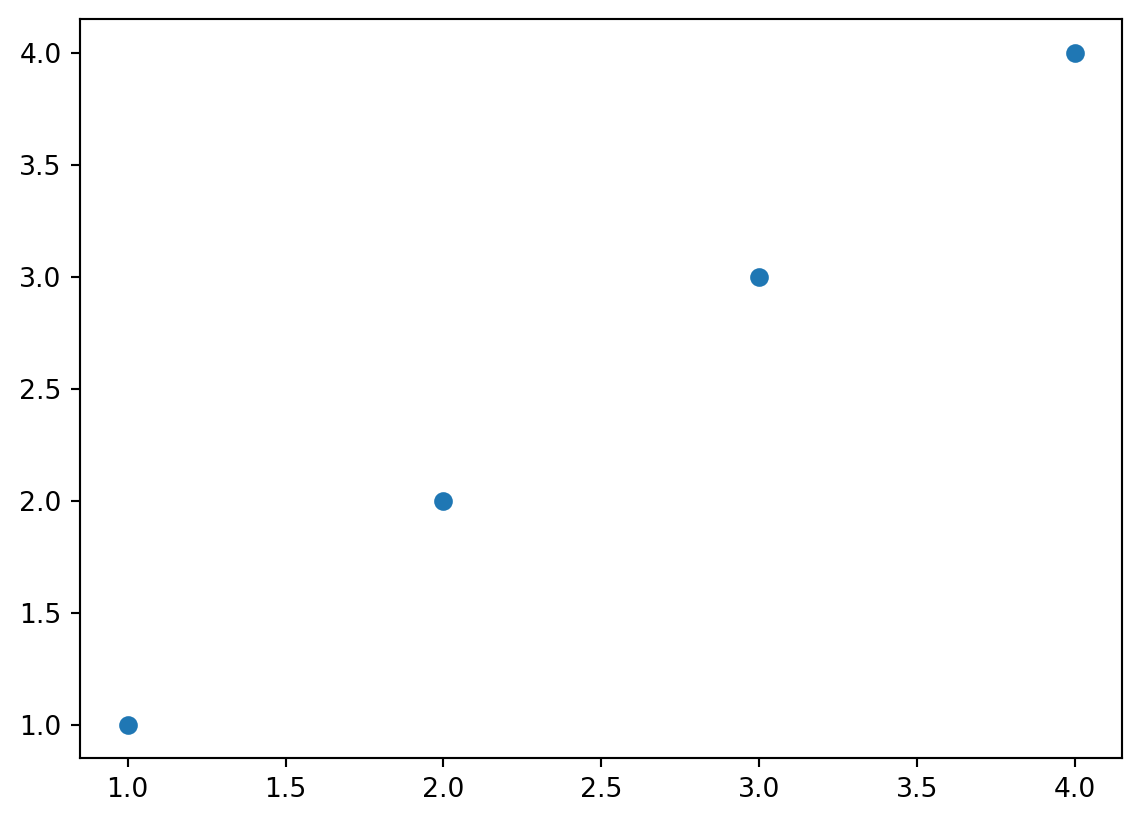

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# DEFINE DATA
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

# PLOT
plt.plot(x, y, "o")  # 'o' makes a scatterplot or point plot
plt.show()

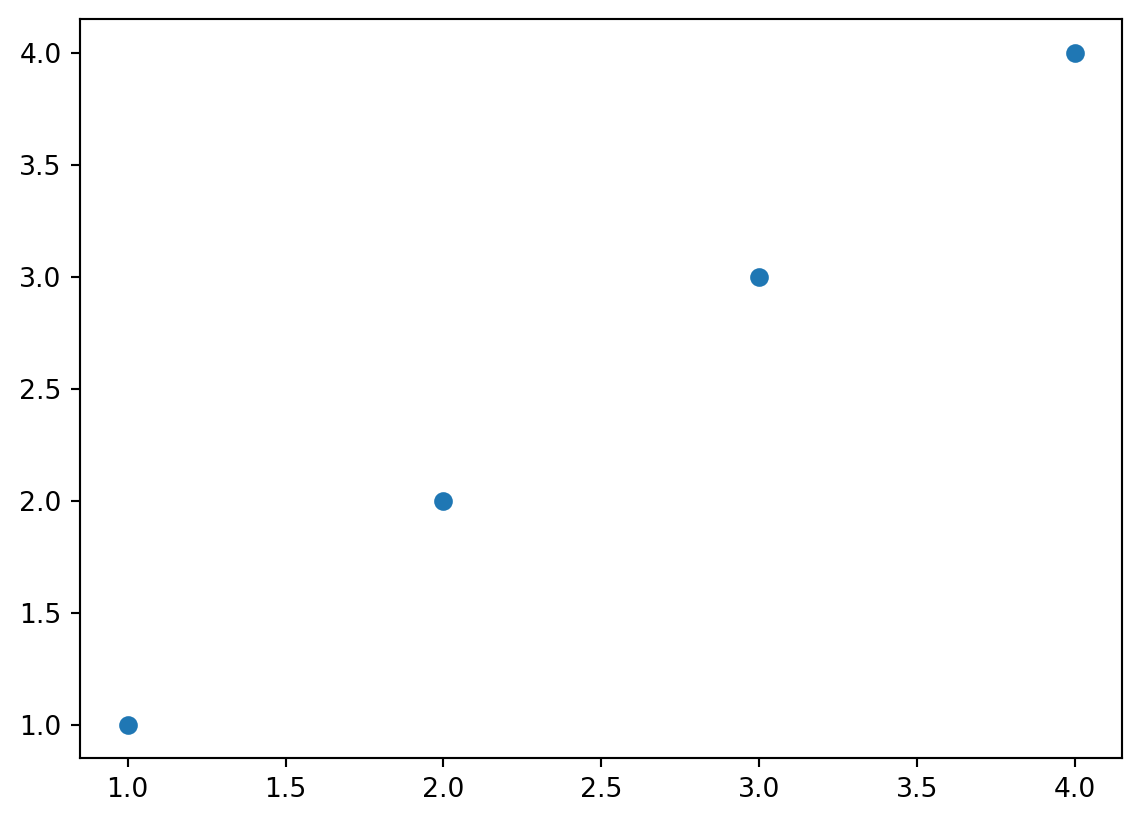

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# DEFINE DATA
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

# DEFINE OBJECTS
fig, ax = plt.subplots() #<1>

# PLOT
ax.plot(x, y, "o") #<2>
#plt.show()

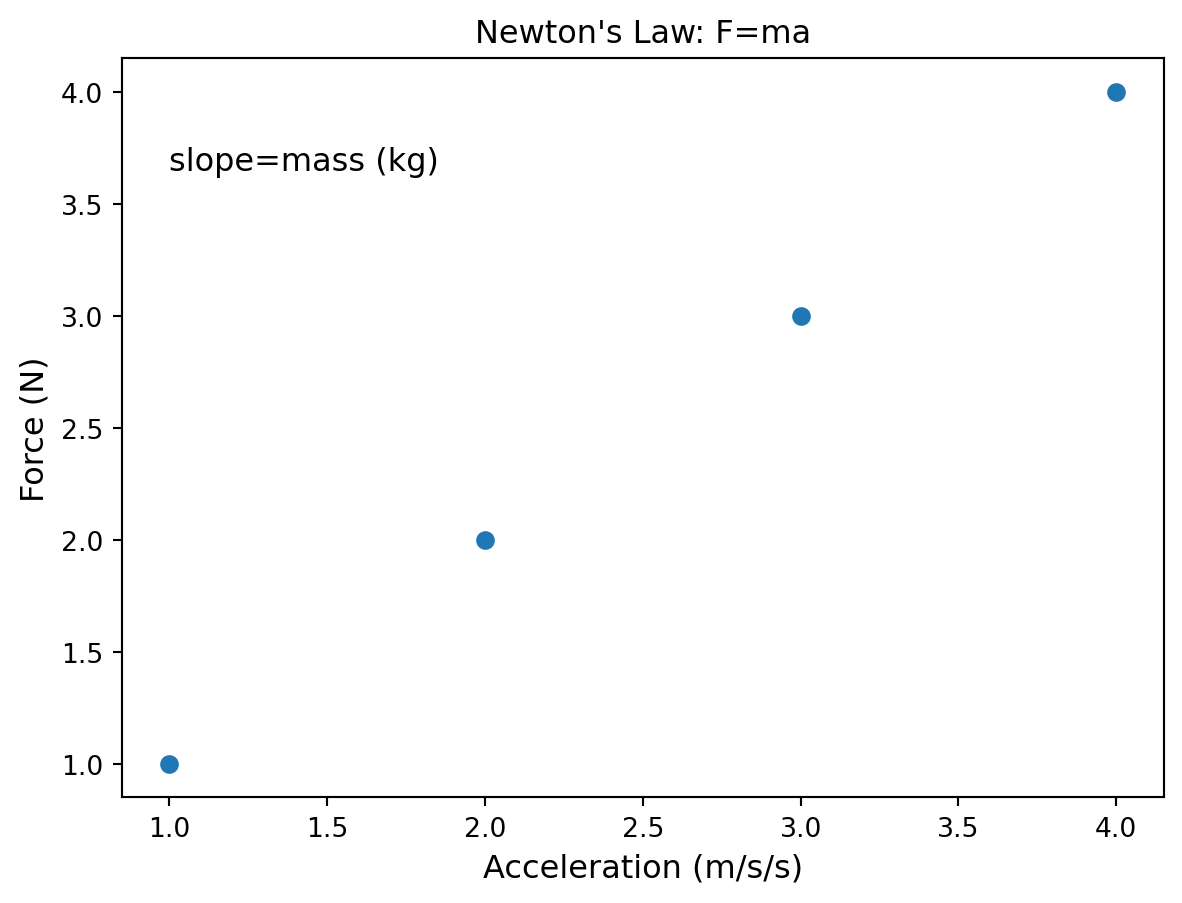

In [5]:
# DEFINE DATA
x = [1, 2, 3, 4]
y = [1, 2, 3, 4]

# DEFINE OBJECTS
fig, ax = plt.subplots()

# PLOT
ax.plot(x, y, "o")

# CUSTOMIZE
FS = 12
ax.set_title("Newton's Law: F=ma", fontsize=FS) #<1>
ax.set_xlabel("Acceleration (m/s/s)", fontsize=FS) #<1>
ax.set_ylabel("Force (N)", fontsize=FS) #<1>
ax.annotate("slope=mass (kg)", (1, 3.65), fontsize=FS) #<2>
plt.show()

In [6]:
# LOAD THE DATA-FRAME (REQUIRES INTERNET)
df = sns.load_dataset("tips")
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<class 'matplotlib.axes._axes.Axes'>


/var/folders/3t/mb4vkd5j5l3282l0nv0gfq800000gn/T/ipykernel_19484/1854731139.py:3: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/3t/mb4vkd5j5l3282l0nv0gfq800000gn/T/ipykernel_19484/1854731139.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



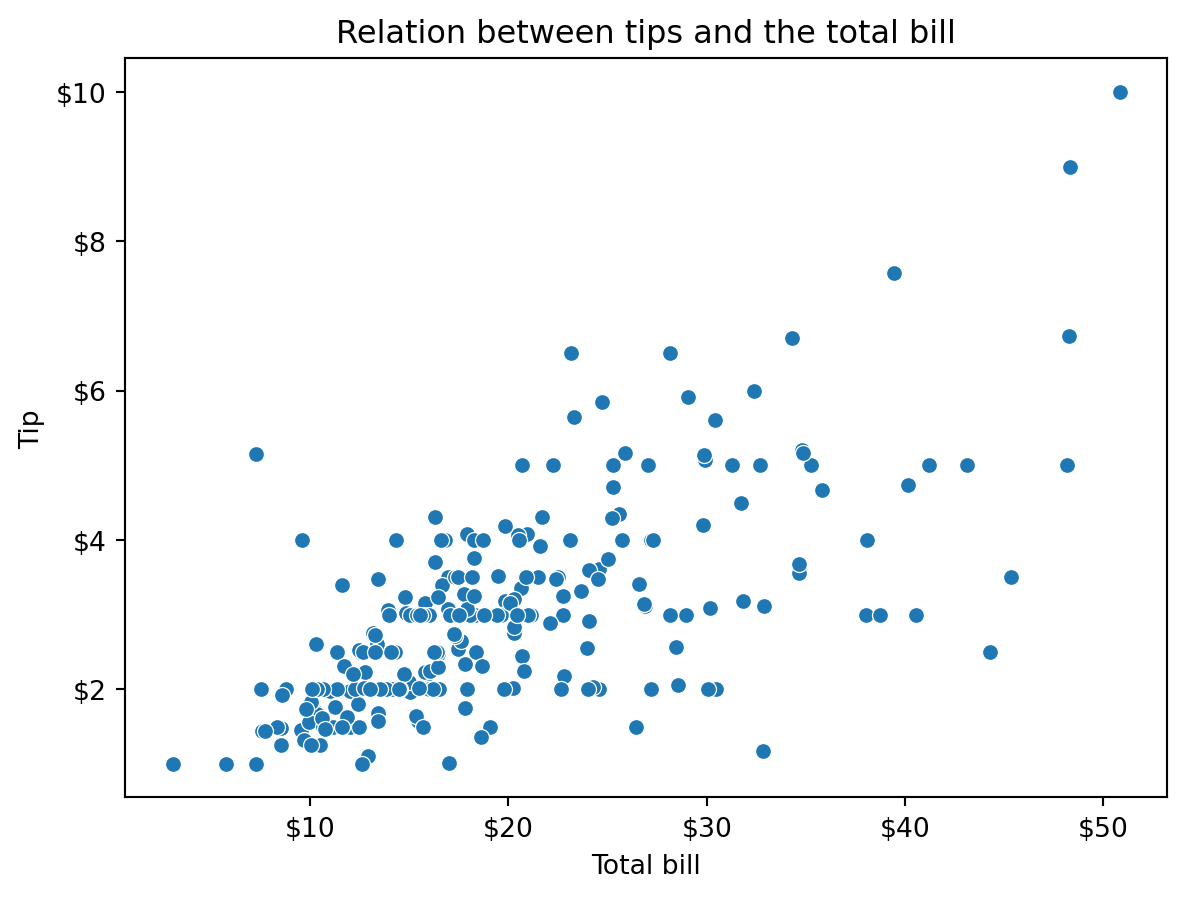

In [7]:
sns_plt = sns.scatterplot(data=df, x="total_bill", y="tip")
xlabels = [f"${x:.0f}" for x in sns_plt.get_xticks()] #<1>
sns_plt.set_xticklabels(xlabels)
sns_plt.set_yticklabels(
  [f"${x:.0f}" for x in sns_plt.get_yticks()]
) #<1>
sns_plt.set(xlabel = "Total bill", ylabel = "Tip",     #<2>
  title = "Relation between tips and the total bill")  #<2>
print(type(sns_plt)) #<3>
plt.show()

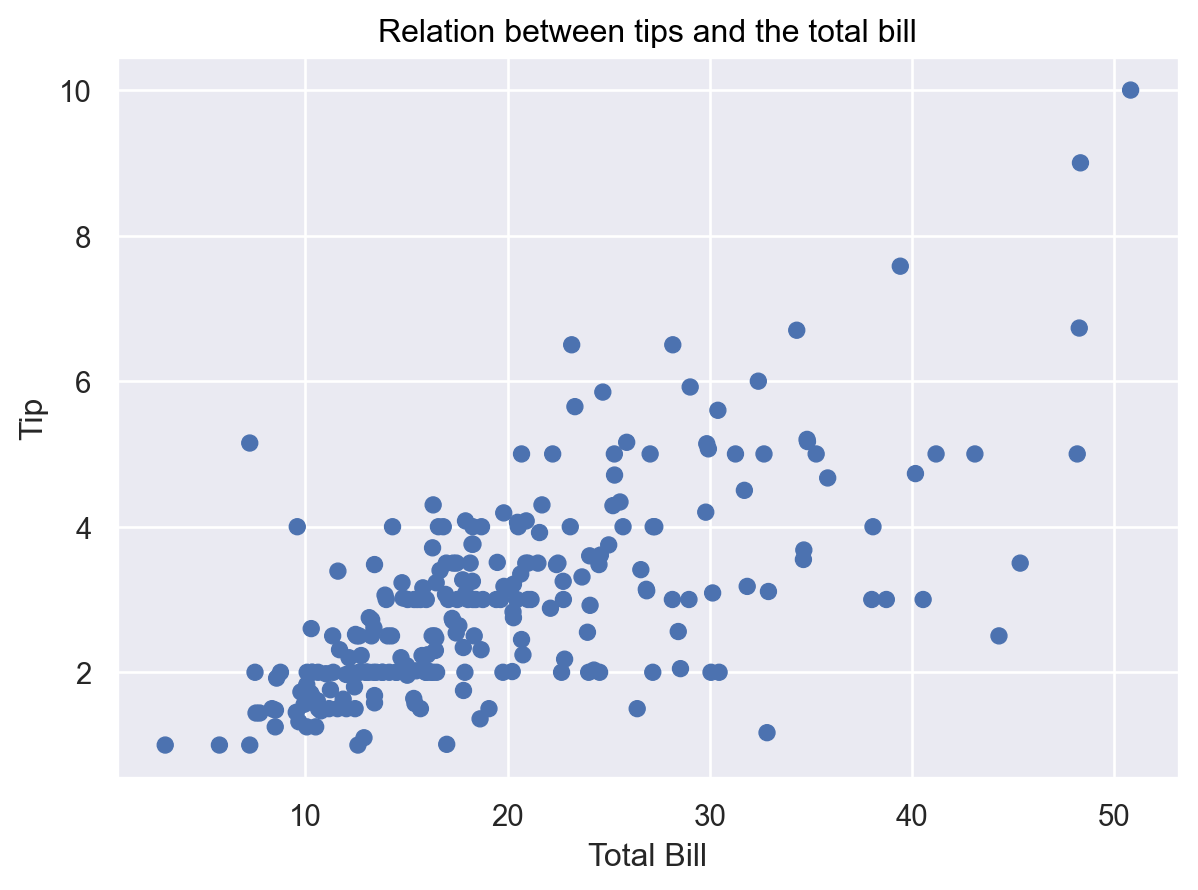

In [8]:
sns_plt2 = (so.Plot(df, x = "total_bill", y = "tip")
    .add(so.Dot())
    .label(x = "Total Bill", y = "Tip",
      title = "Relation between tips and the total bill"))
sns_plt2

In [9]:
print(type(sns_plt2)) #<1>

<class 'seaborn._core.plot.Plot'>


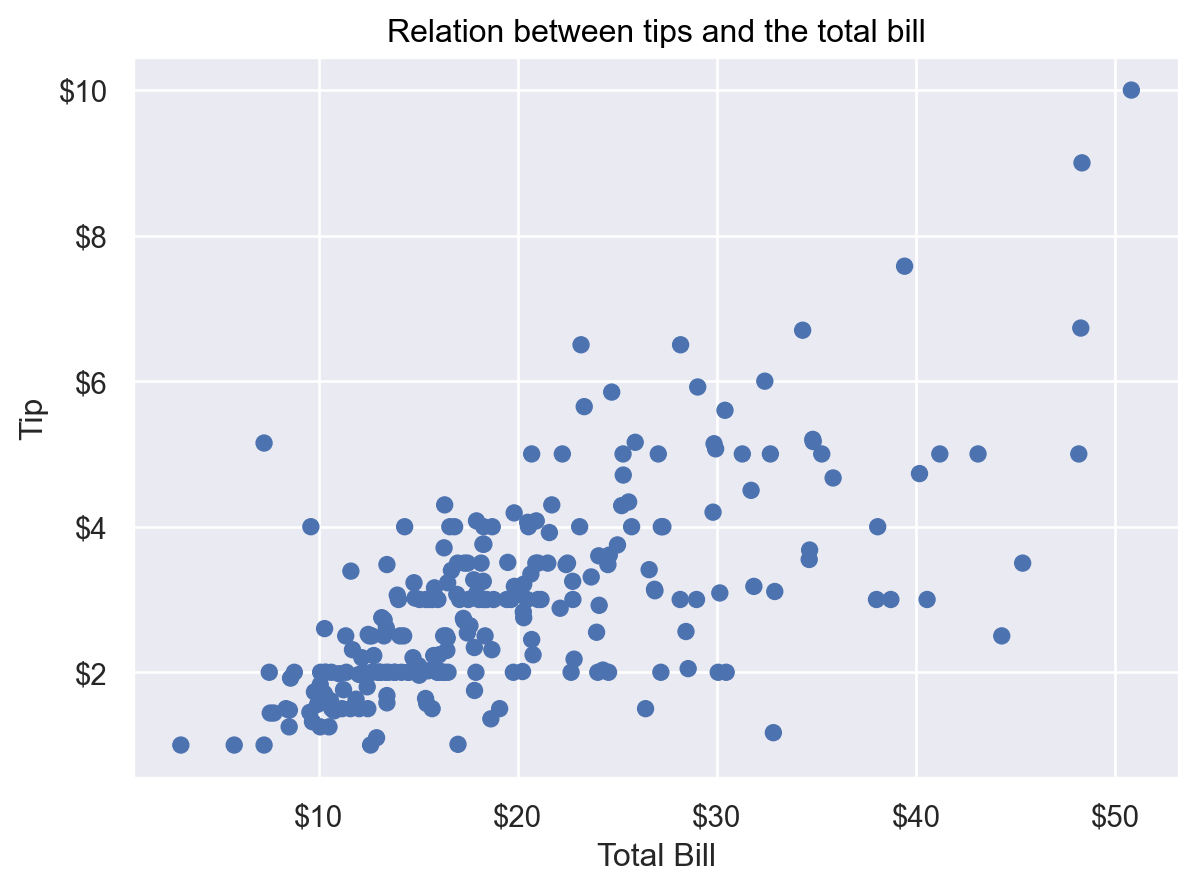

In [10]:
from matplotlib.ticker import FuncFormatter
(sns_plt2.
  scale(
    x = so.Continuous().label(FuncFormatter(lambda x, pos: f"${x:.0f}")),
    y = so.Continuous().label(FuncFormatter(lambda x, pos: f"${x:.0f}"))
  ))

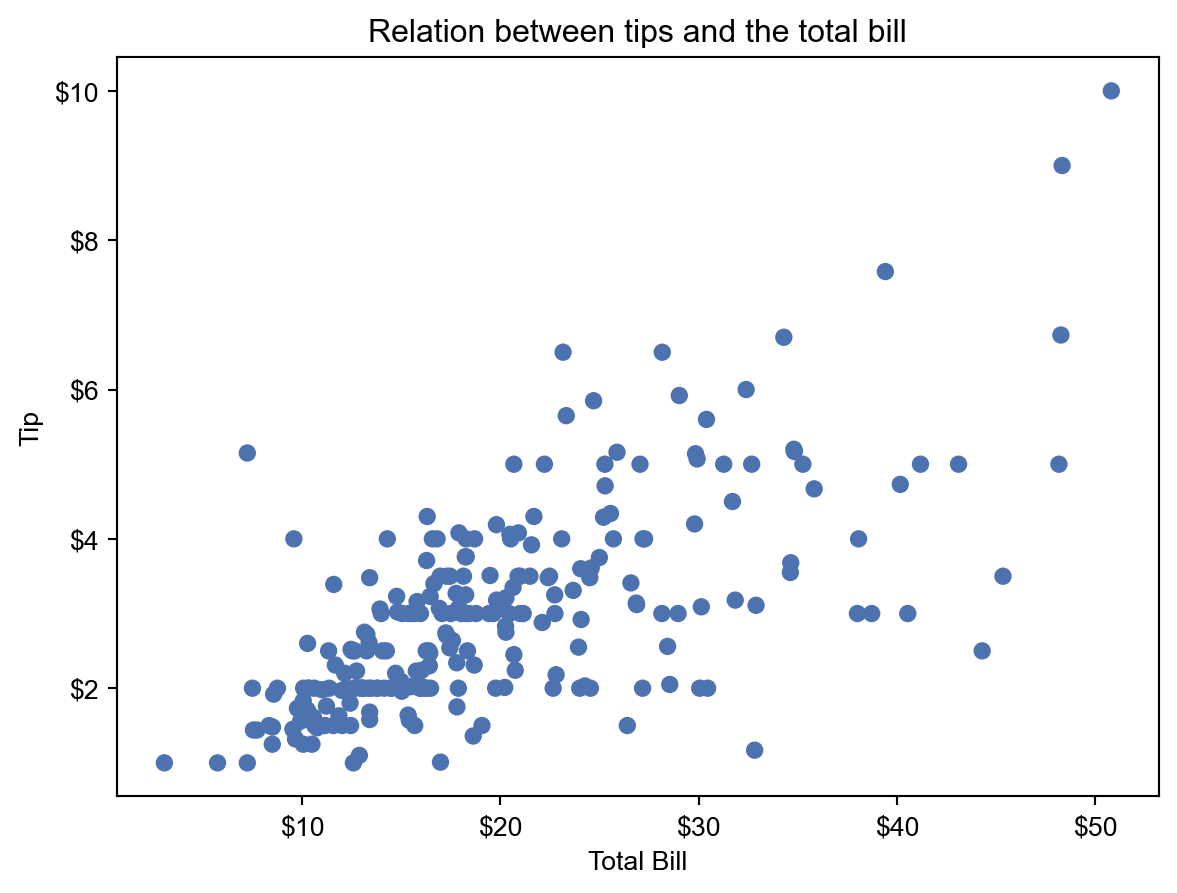

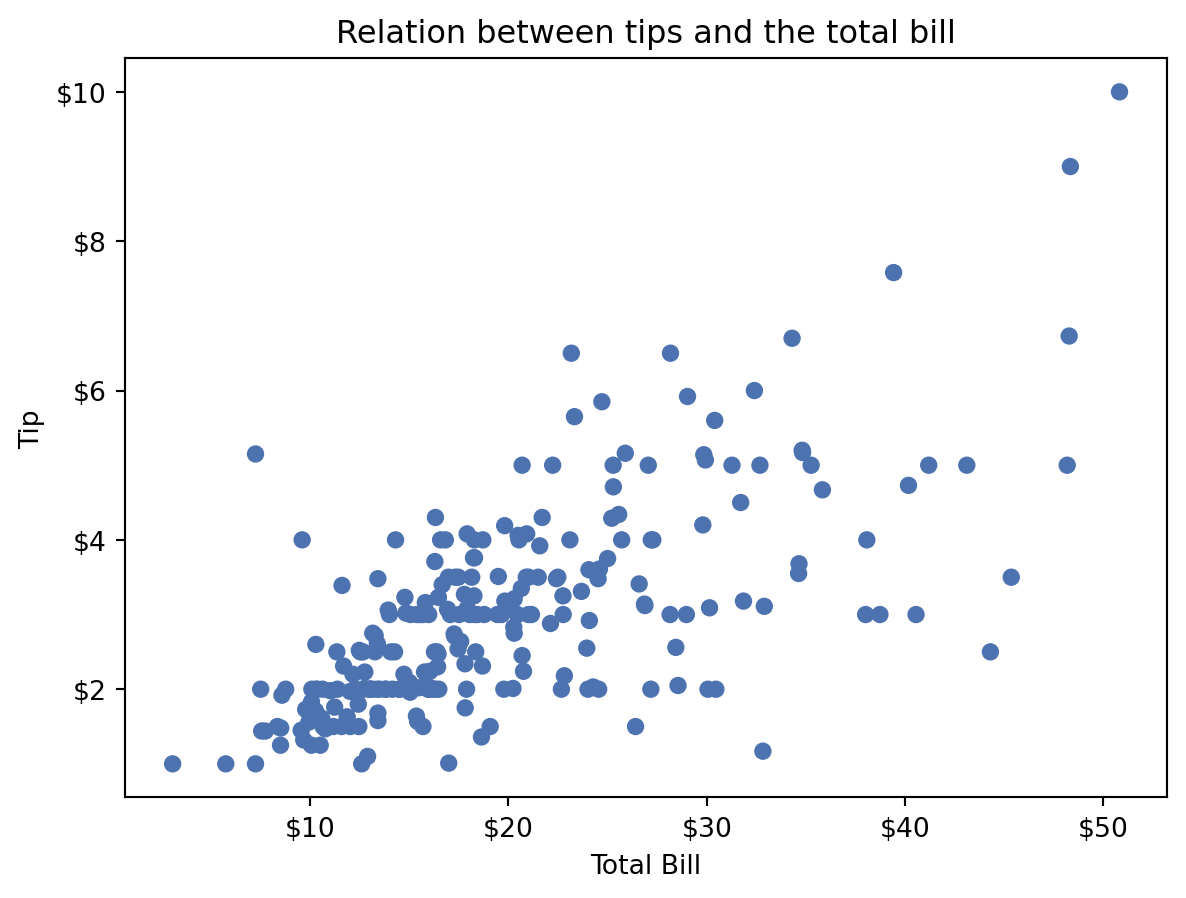

In [11]:
from matplotlib import ticker
fig,ax = plt.subplots()
res = sns_plt2.on(ax).plot()  #<1>
ax.xaxis.set_major_formatter( #<2>
  ticker.FuncFormatter(lambda x,pos: f"${x:.0f}")
)
ax.yaxis.set_major_formatter(
  ticker.FuncFormatter(lambda x,pos: f"${x:.0f}")
) #<2>
res

In [12]:
#| include: false
fig.clf()

<class 'seaborn.axisgrid.FacetGrid'>


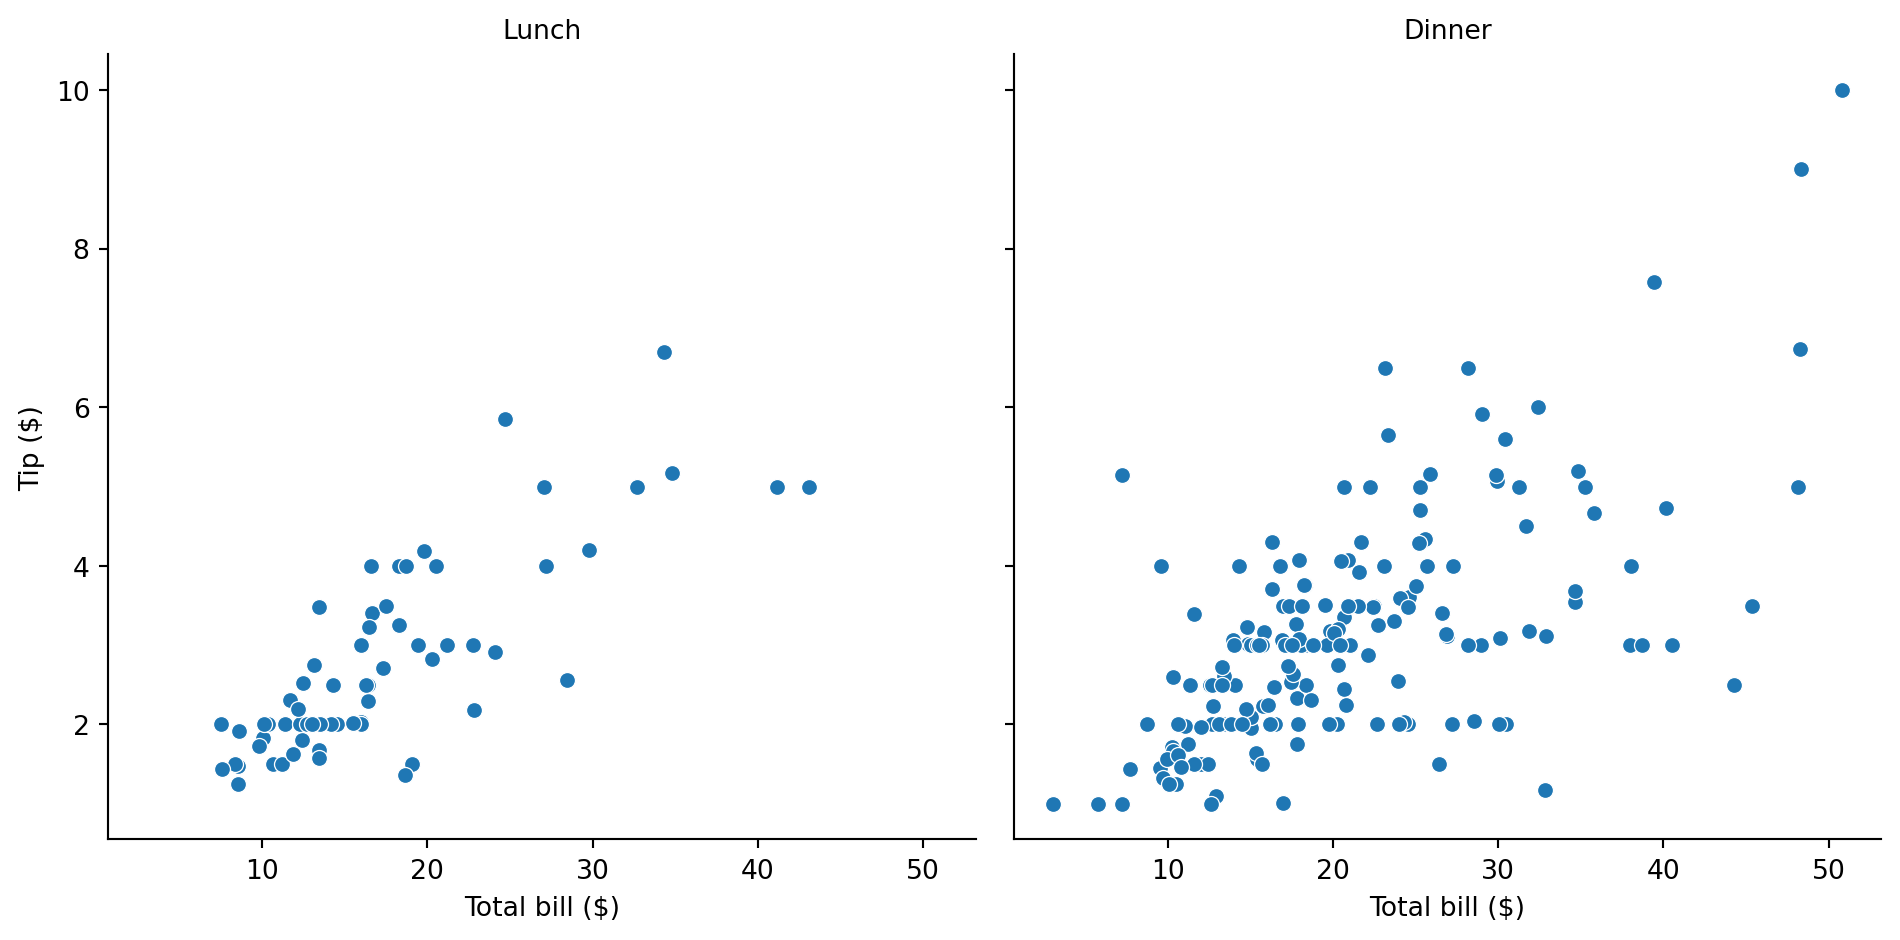

In [13]:
my_plot = sns.relplot(data=df, x="total_bill", y="tip", col="time")
my_plot.set(xlabel = "Total bill ($)", ylabel = "Tip ($)",
  title="Test")
my_plot.set_titles("{col_name}") #<1>
print(type(my_plot))
plt.show()

<class 'seaborn._core.plot.Plot'>


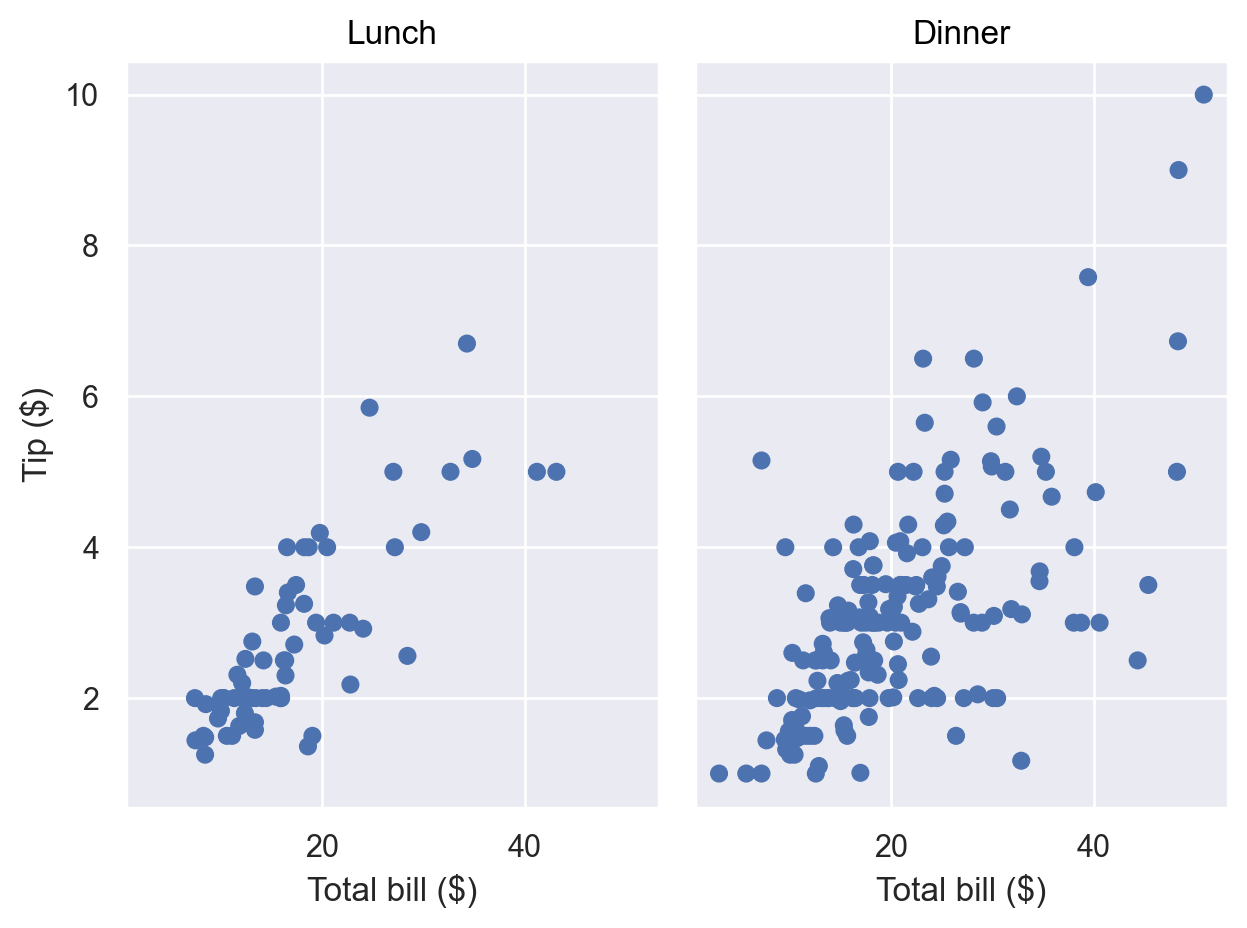

In [14]:
sns_plt = (so.Plot(df, x = "total_bill", y = "tip")
    .add(so.Dot())
    .facet("time")
    .label(x = "Total bill ($)", y = "Tip ($)"))
print(type(sns_plt))
sns_plt.show()

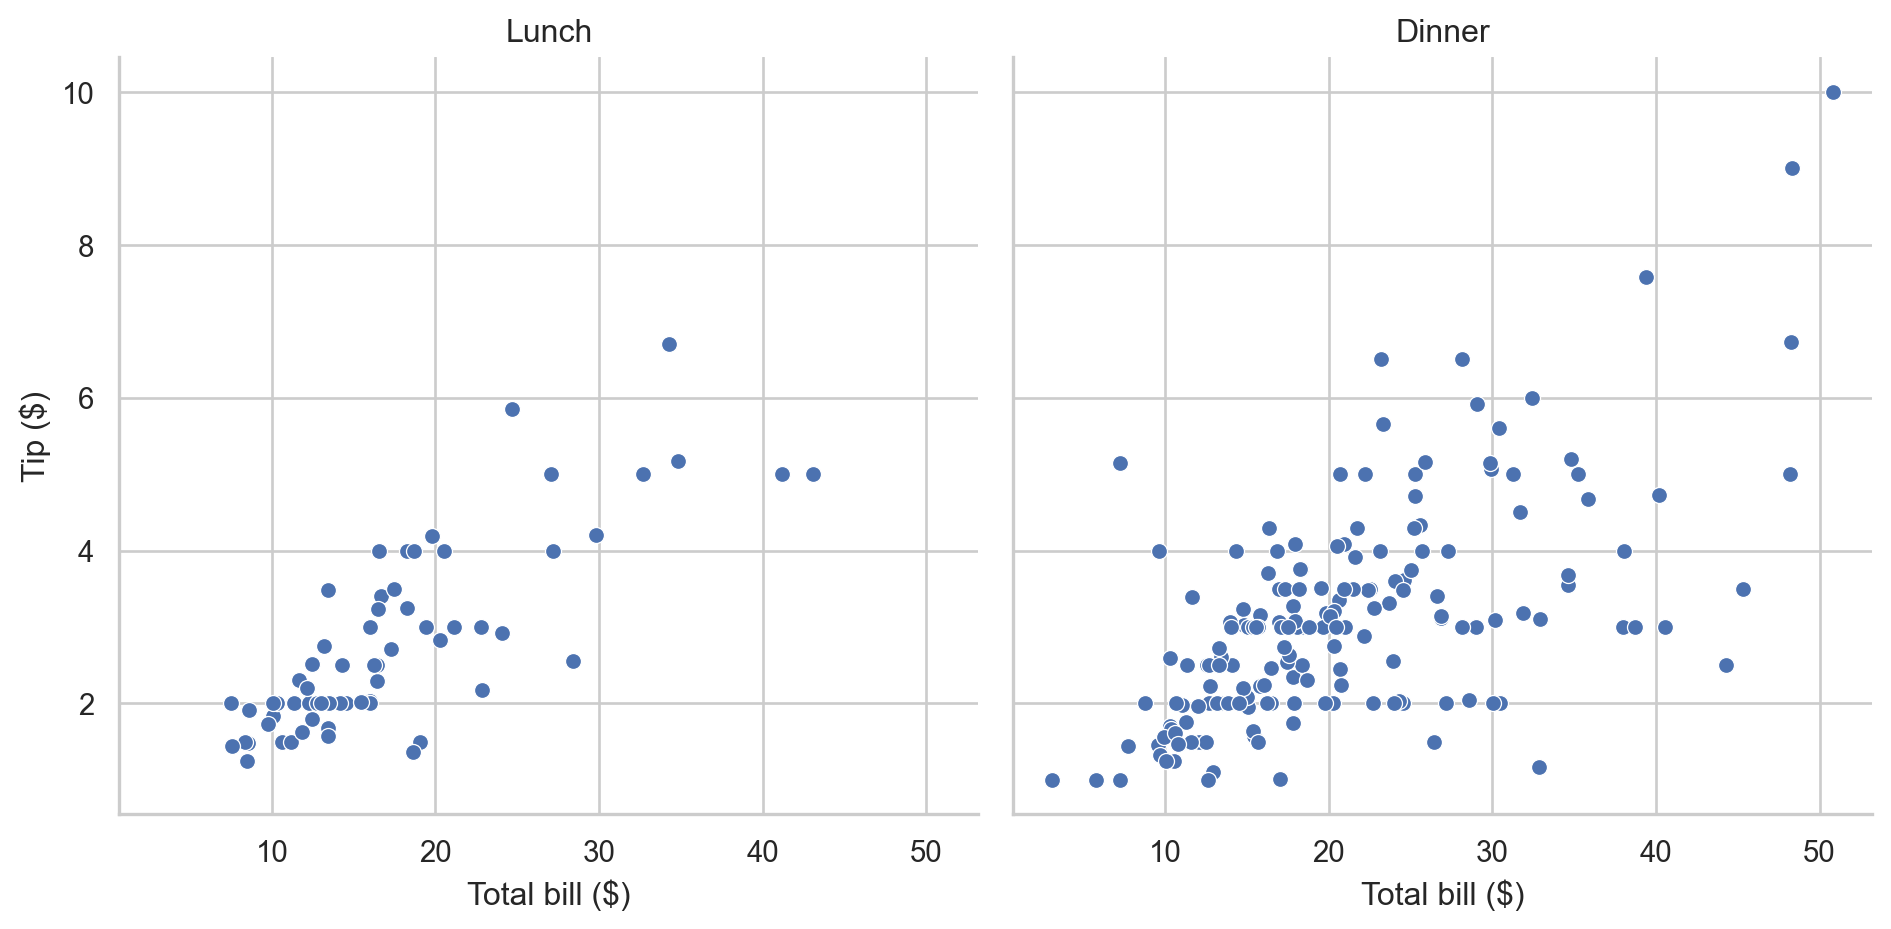

In [15]:
sns.set_theme(style = "whitegrid")
def sns_plot2():
  my_plot=sns.relplot(data=df, x="total_bill", y="tip", col="time")
  my_plot.set(xlabel = "Total bill ($)", ylabel = "Tip ($)",
  title="Test")
  my_plot.set_titles("{col_name}")
  plt.show()

sns_plot2()

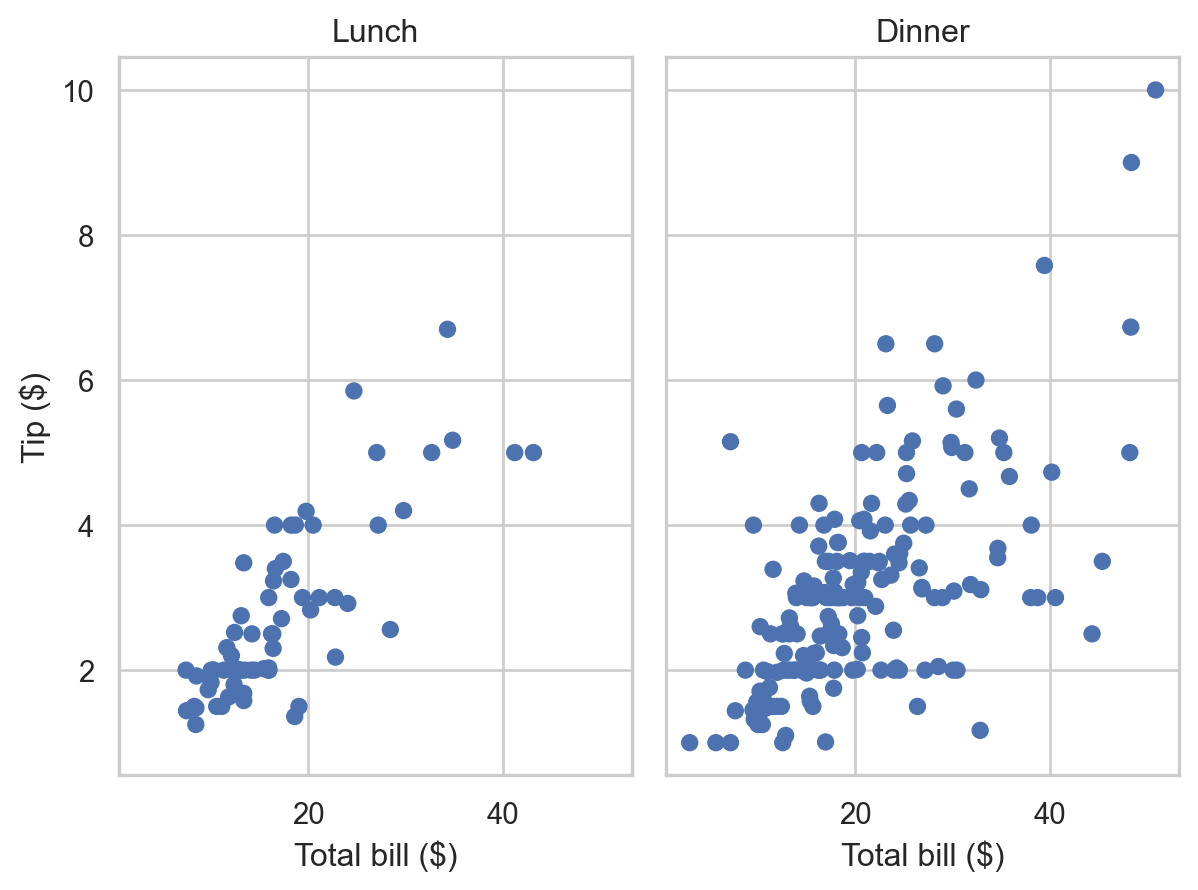

In [16]:
sns_plt.theme(sns.axes_style("whitegrid")) #<1>

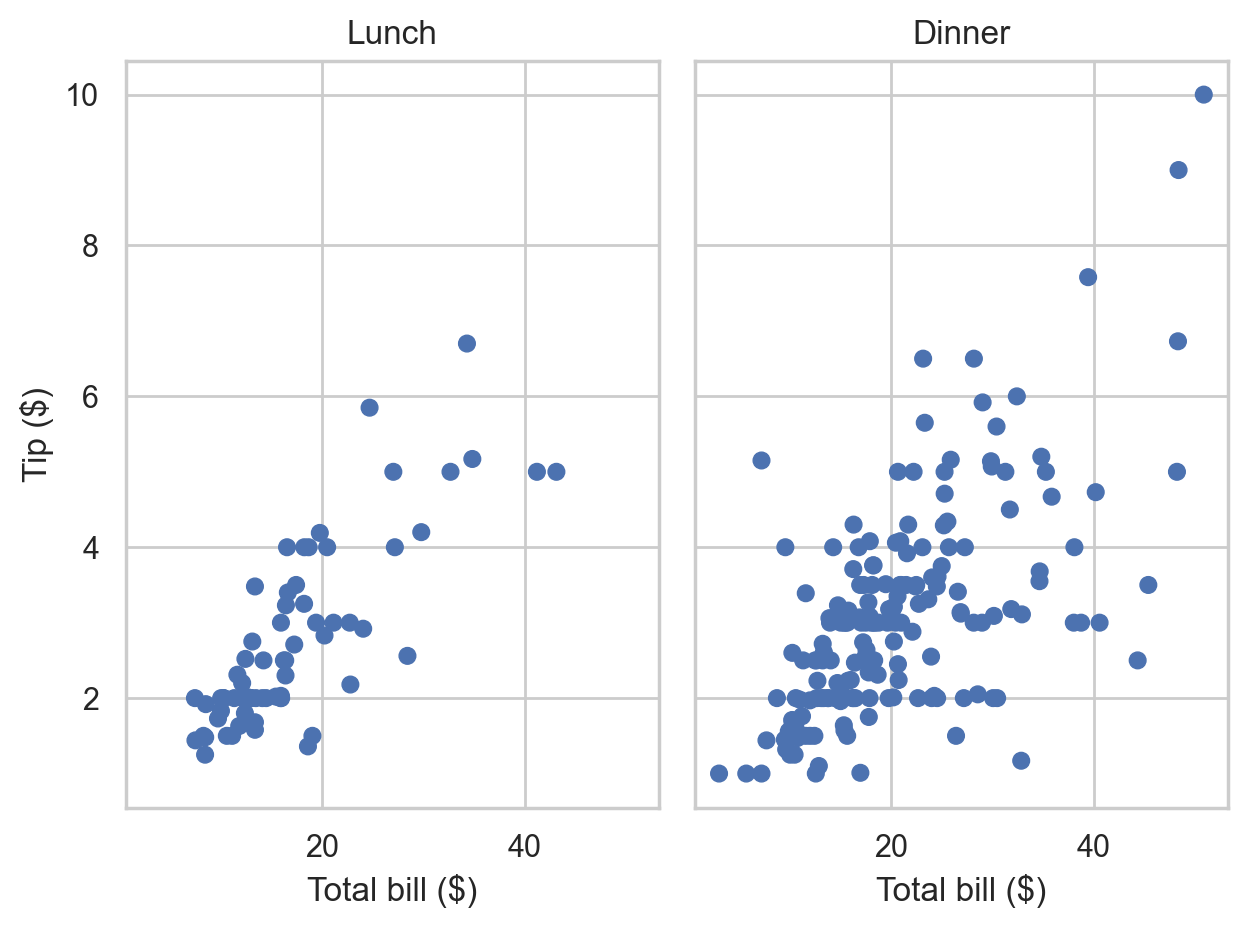

In [17]:
so.Plot.config.theme.update(sns.axes_style("whitegrid"))
sns_plt.show()

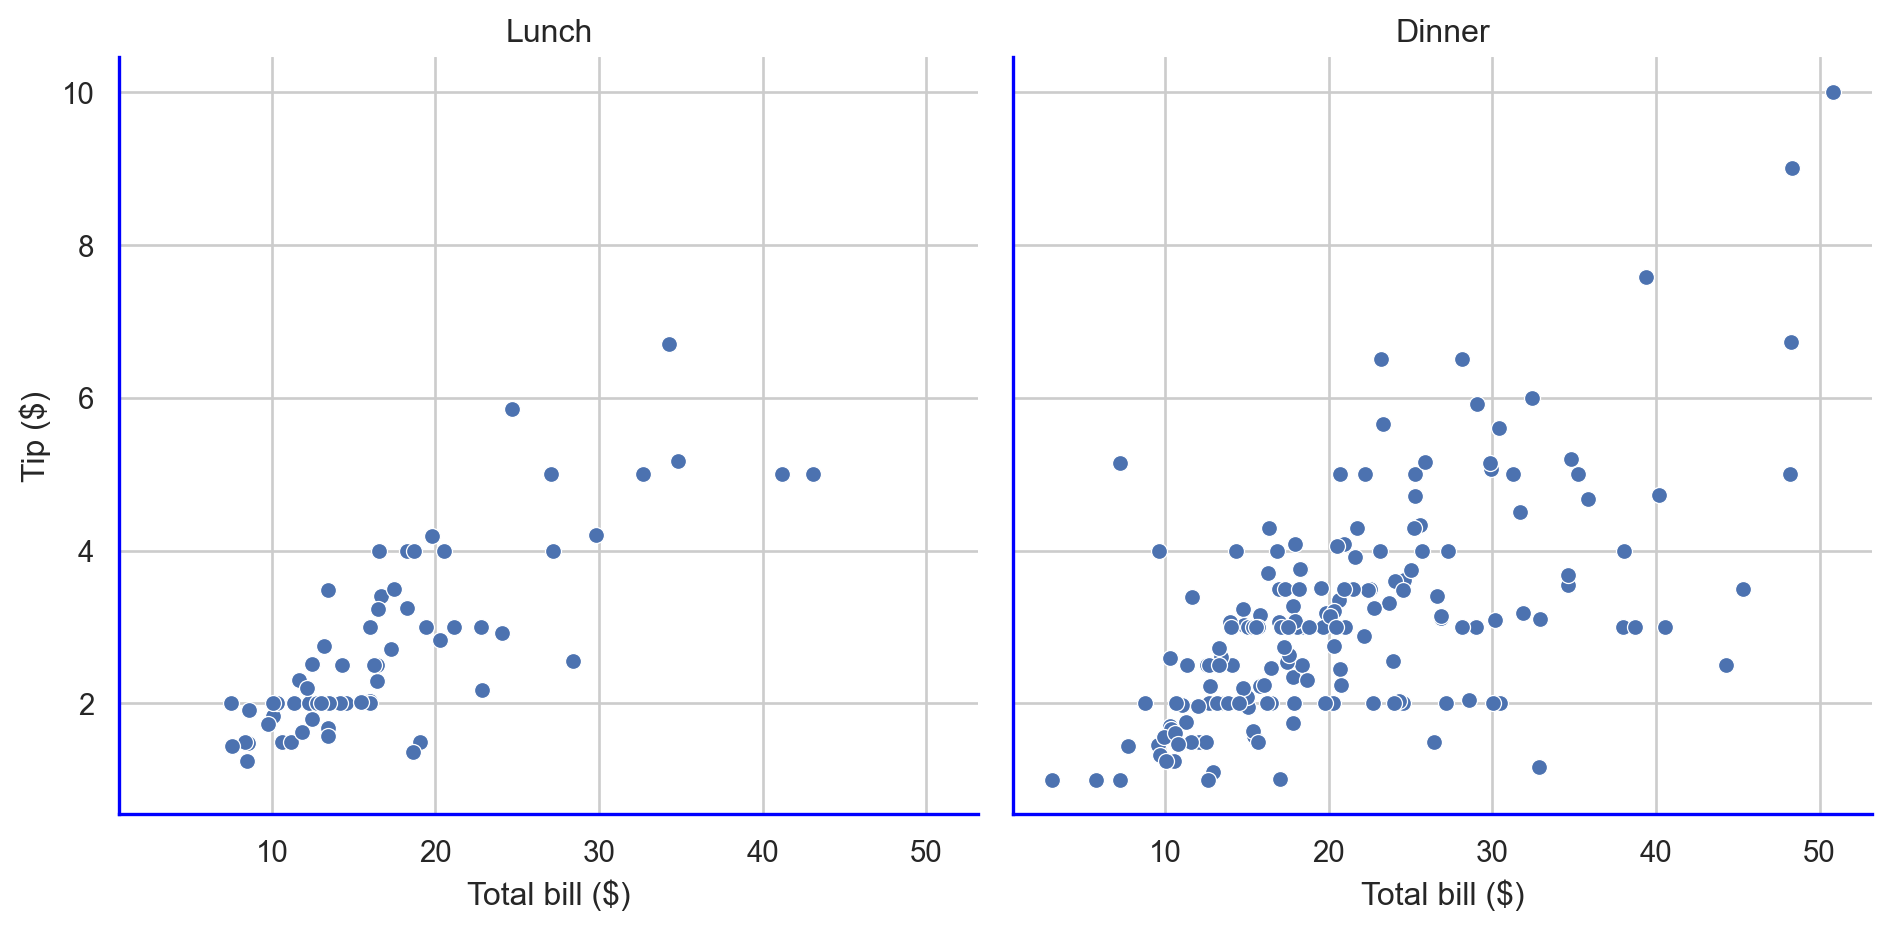

In [18]:
sns.set_style({"axes.facecolor": "w", "axes.edgecolor": "blue"})
sns_plot2()

In [19]:
#| include: false
mpl.style.use('default')

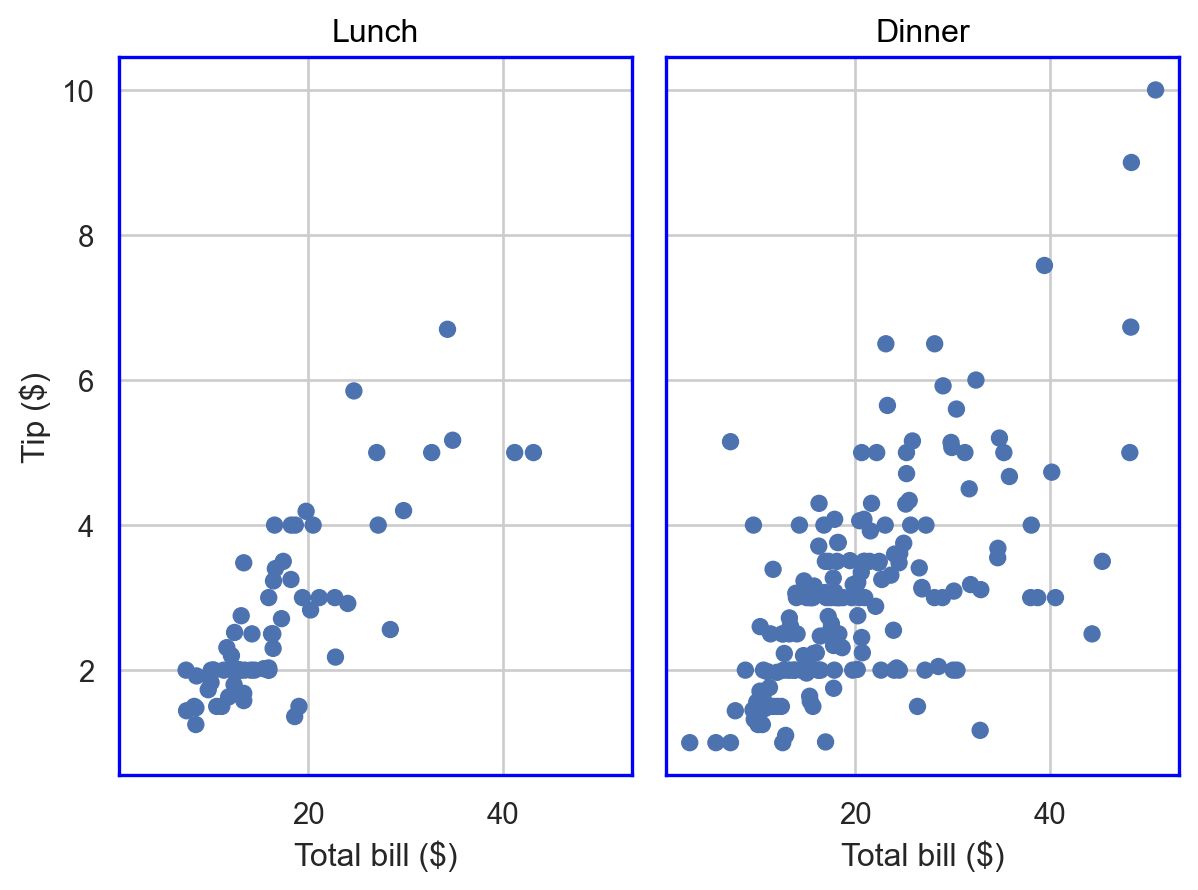

In [20]:
sns_plt.theme({"axes.facecolor": "w", "axes.edgecolor": "blue"})

In [21]:
#| eval: false
# Run on your own machine; it's long.
mpl.rcParamsDefault

In [22]:
print(len(mpl.rcParamsDefault))

322


In [23]:
isinstance(mpl.rcParamsDefault, dict)

True

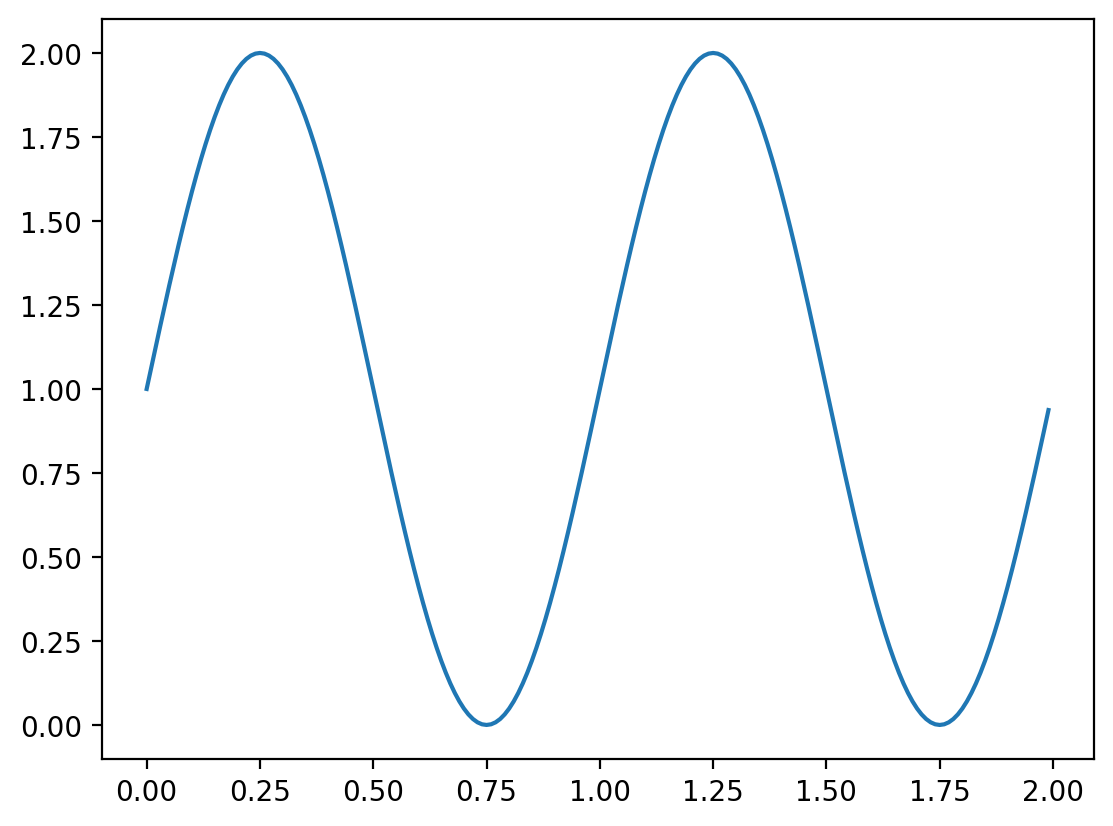

In [24]:
def mpl_plot():
    # DATA FOR PLOTTING
    t = np.arange(0.0, 2.0, 0.01)
    s = 1 + np.sin(2 * np.pi * t)

    # INITIALIZE
    fig, ax = plt.subplots()

    # PLOT
    ax.plot(t, s)
    plt.show()


mpl_plot()

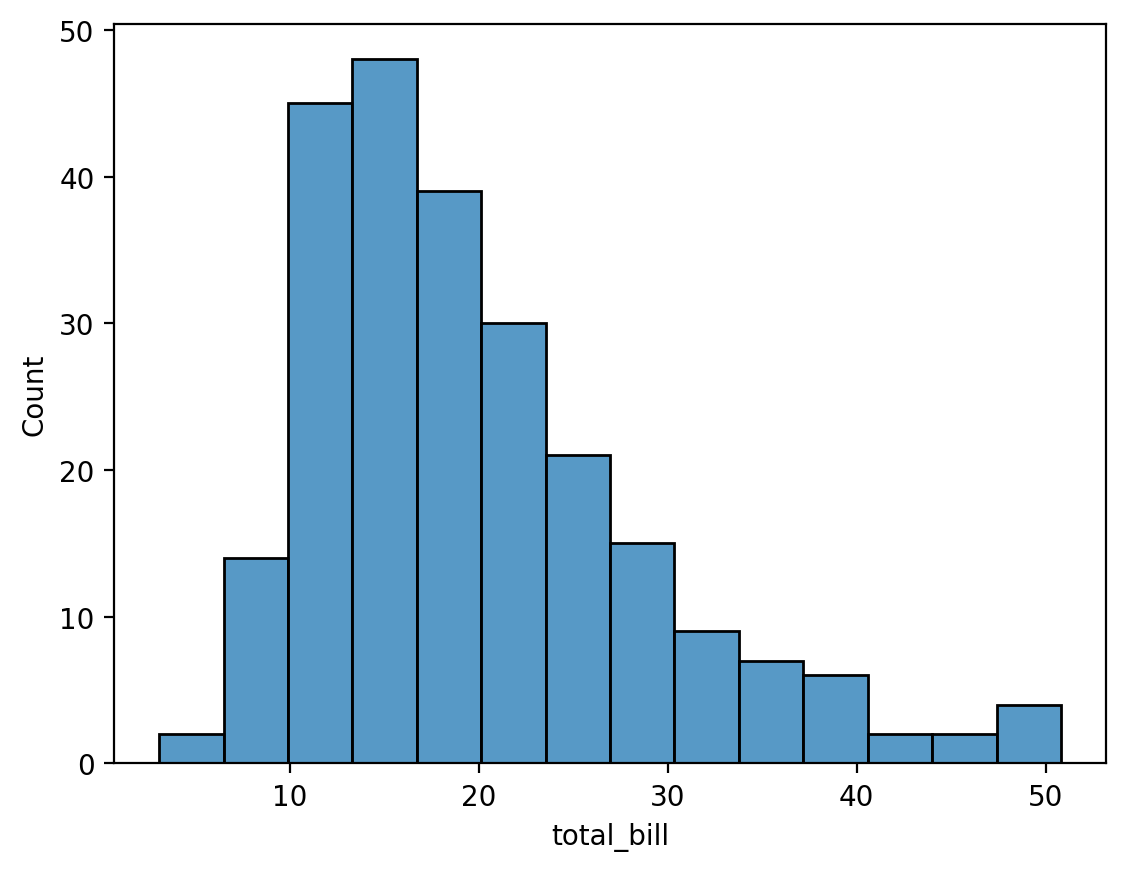

In [25]:
def sns_plot():
    tips = sns.load_dataset("tips")
    sns.histplot(tips["total_bill"])
    plt.show()
sns_plot()

In [26]:
# print(type(plt.rcParams))
plt.rcParams.update(plt.rcParamsDefault)

print("BEFORE:", plt.rcParams["figure.figsize"])

# YOU CAN ALSO MODIFY THESE ATTRIBUTES
plt.rcParams["figure.figsize"] = (
    10,
    10,
)  # change the default figure size to a 10in x 10in resolution
print("AFTER:", plt.rcParams["figure.figsize"])

plt.rcParams["axes.grid"] = True
plt.rcParams["axes.linewidth"] = 2
plt.rcParams["lines.linewidth"] = 4
plt.rcParams["lines.linestyle"] = "dotted"
# change the order in which colors are chosen
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=["#32a852", "r", "b", "y"])
plt.rcParams["font.size"] = 16
plt.rcParams["axes.facecolor"] = "f0f0f0"
plt.rcParams["font.family"] = "serif"
plt.rcParams["lines.linewidth"] = 5
plt.rcParams["xtick.labelsize"] = 24
plt.rcParams["ytick.labelsize"] = 24

BEFORE: [6.4, 4.8]
AFTER: [10.0, 10.0]


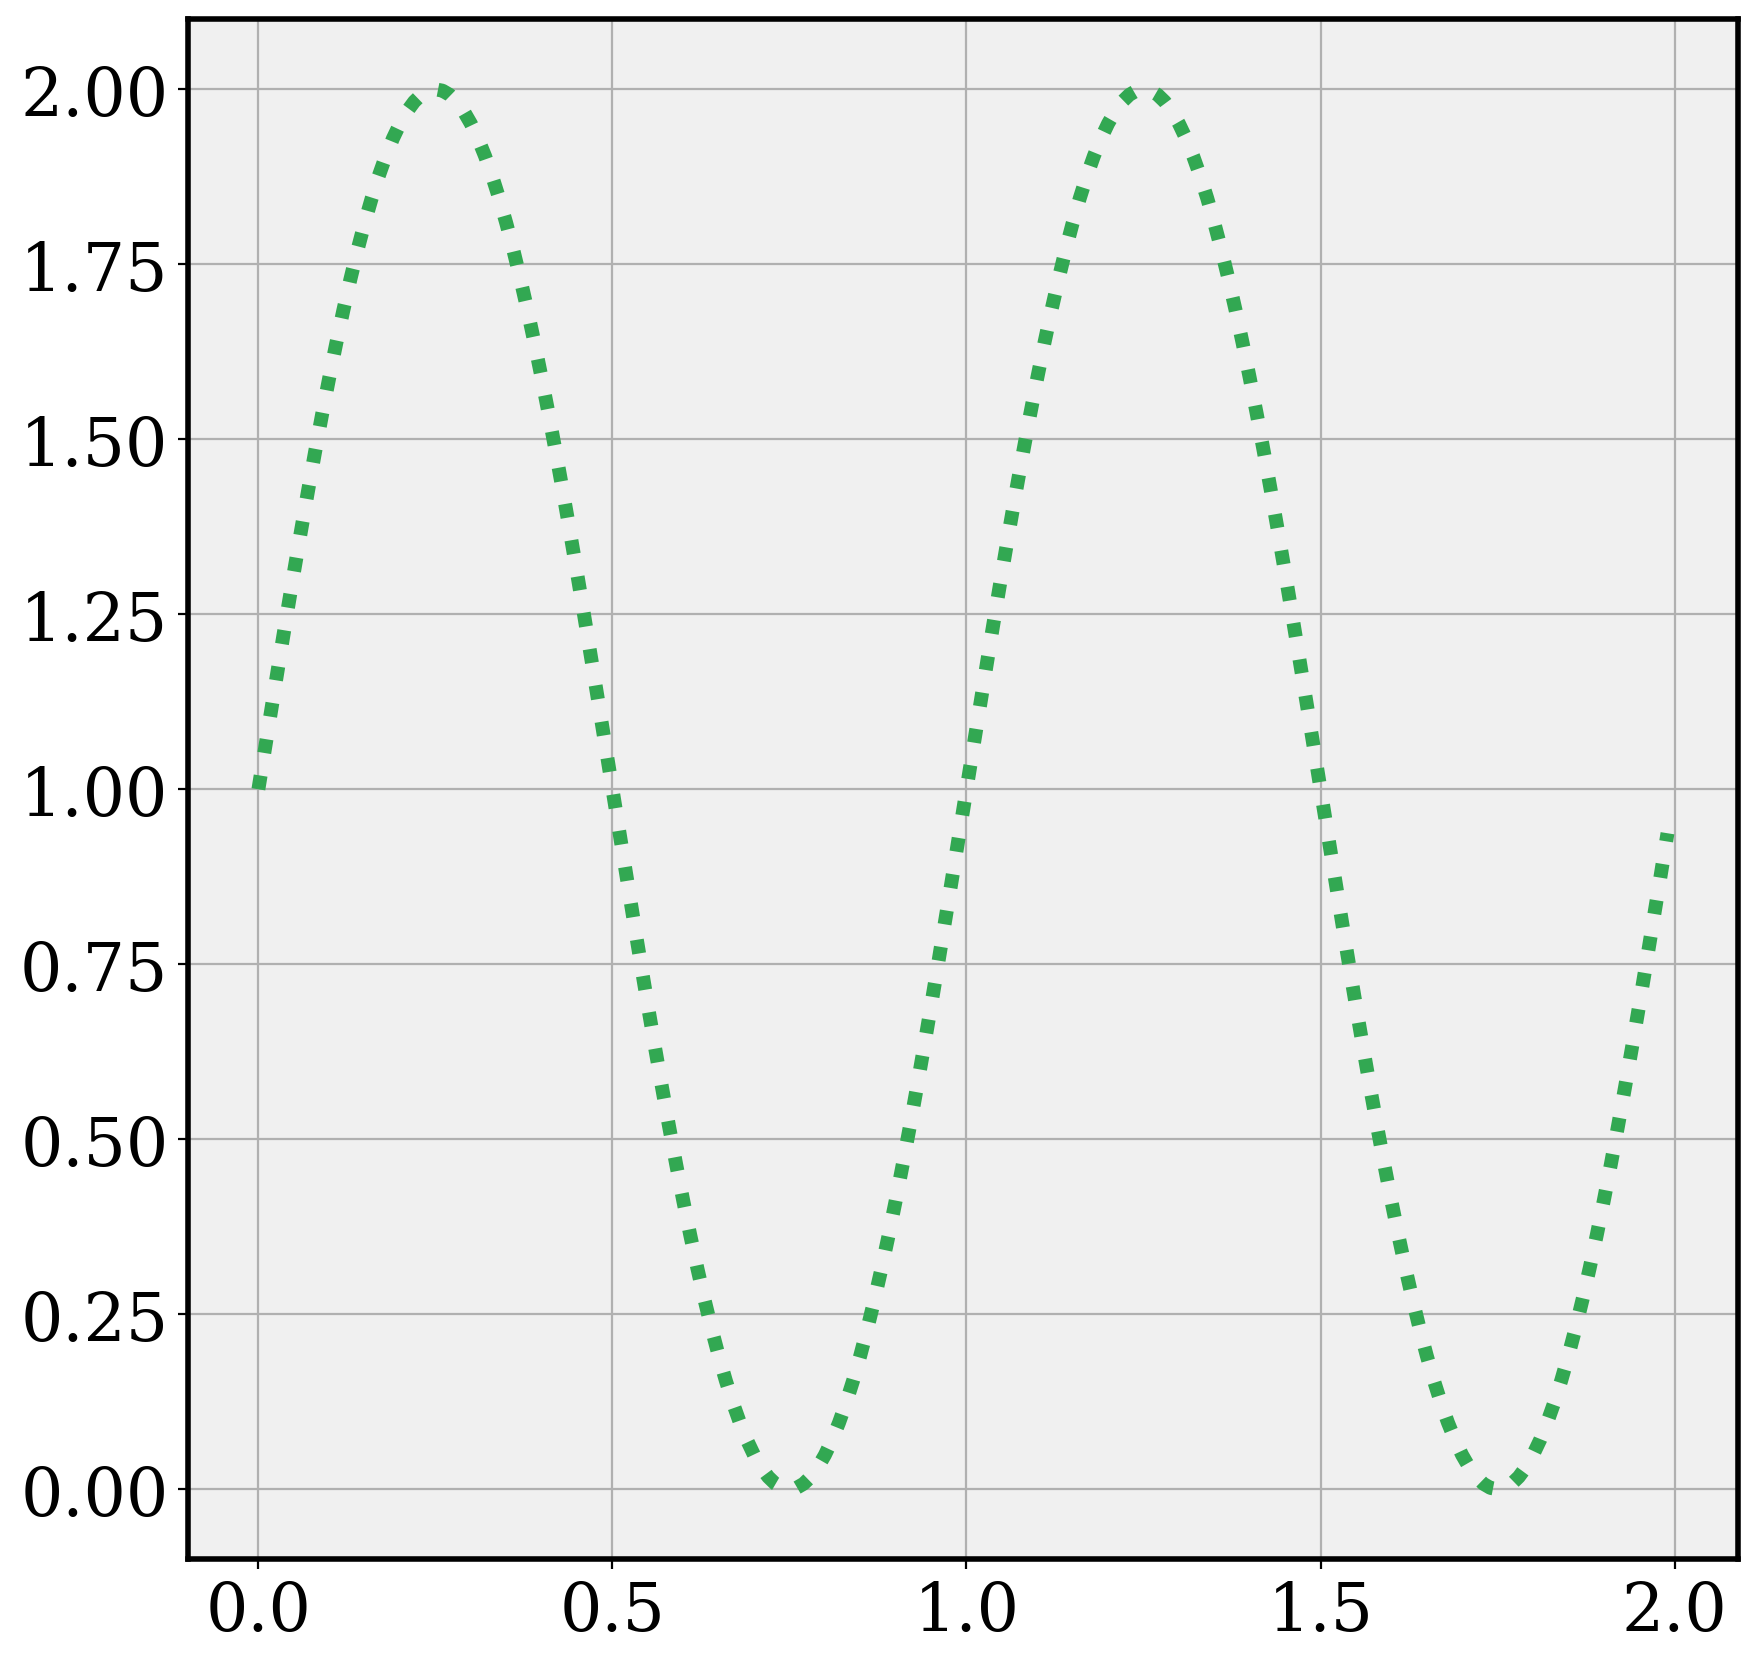

In [27]:
mpl_plot()

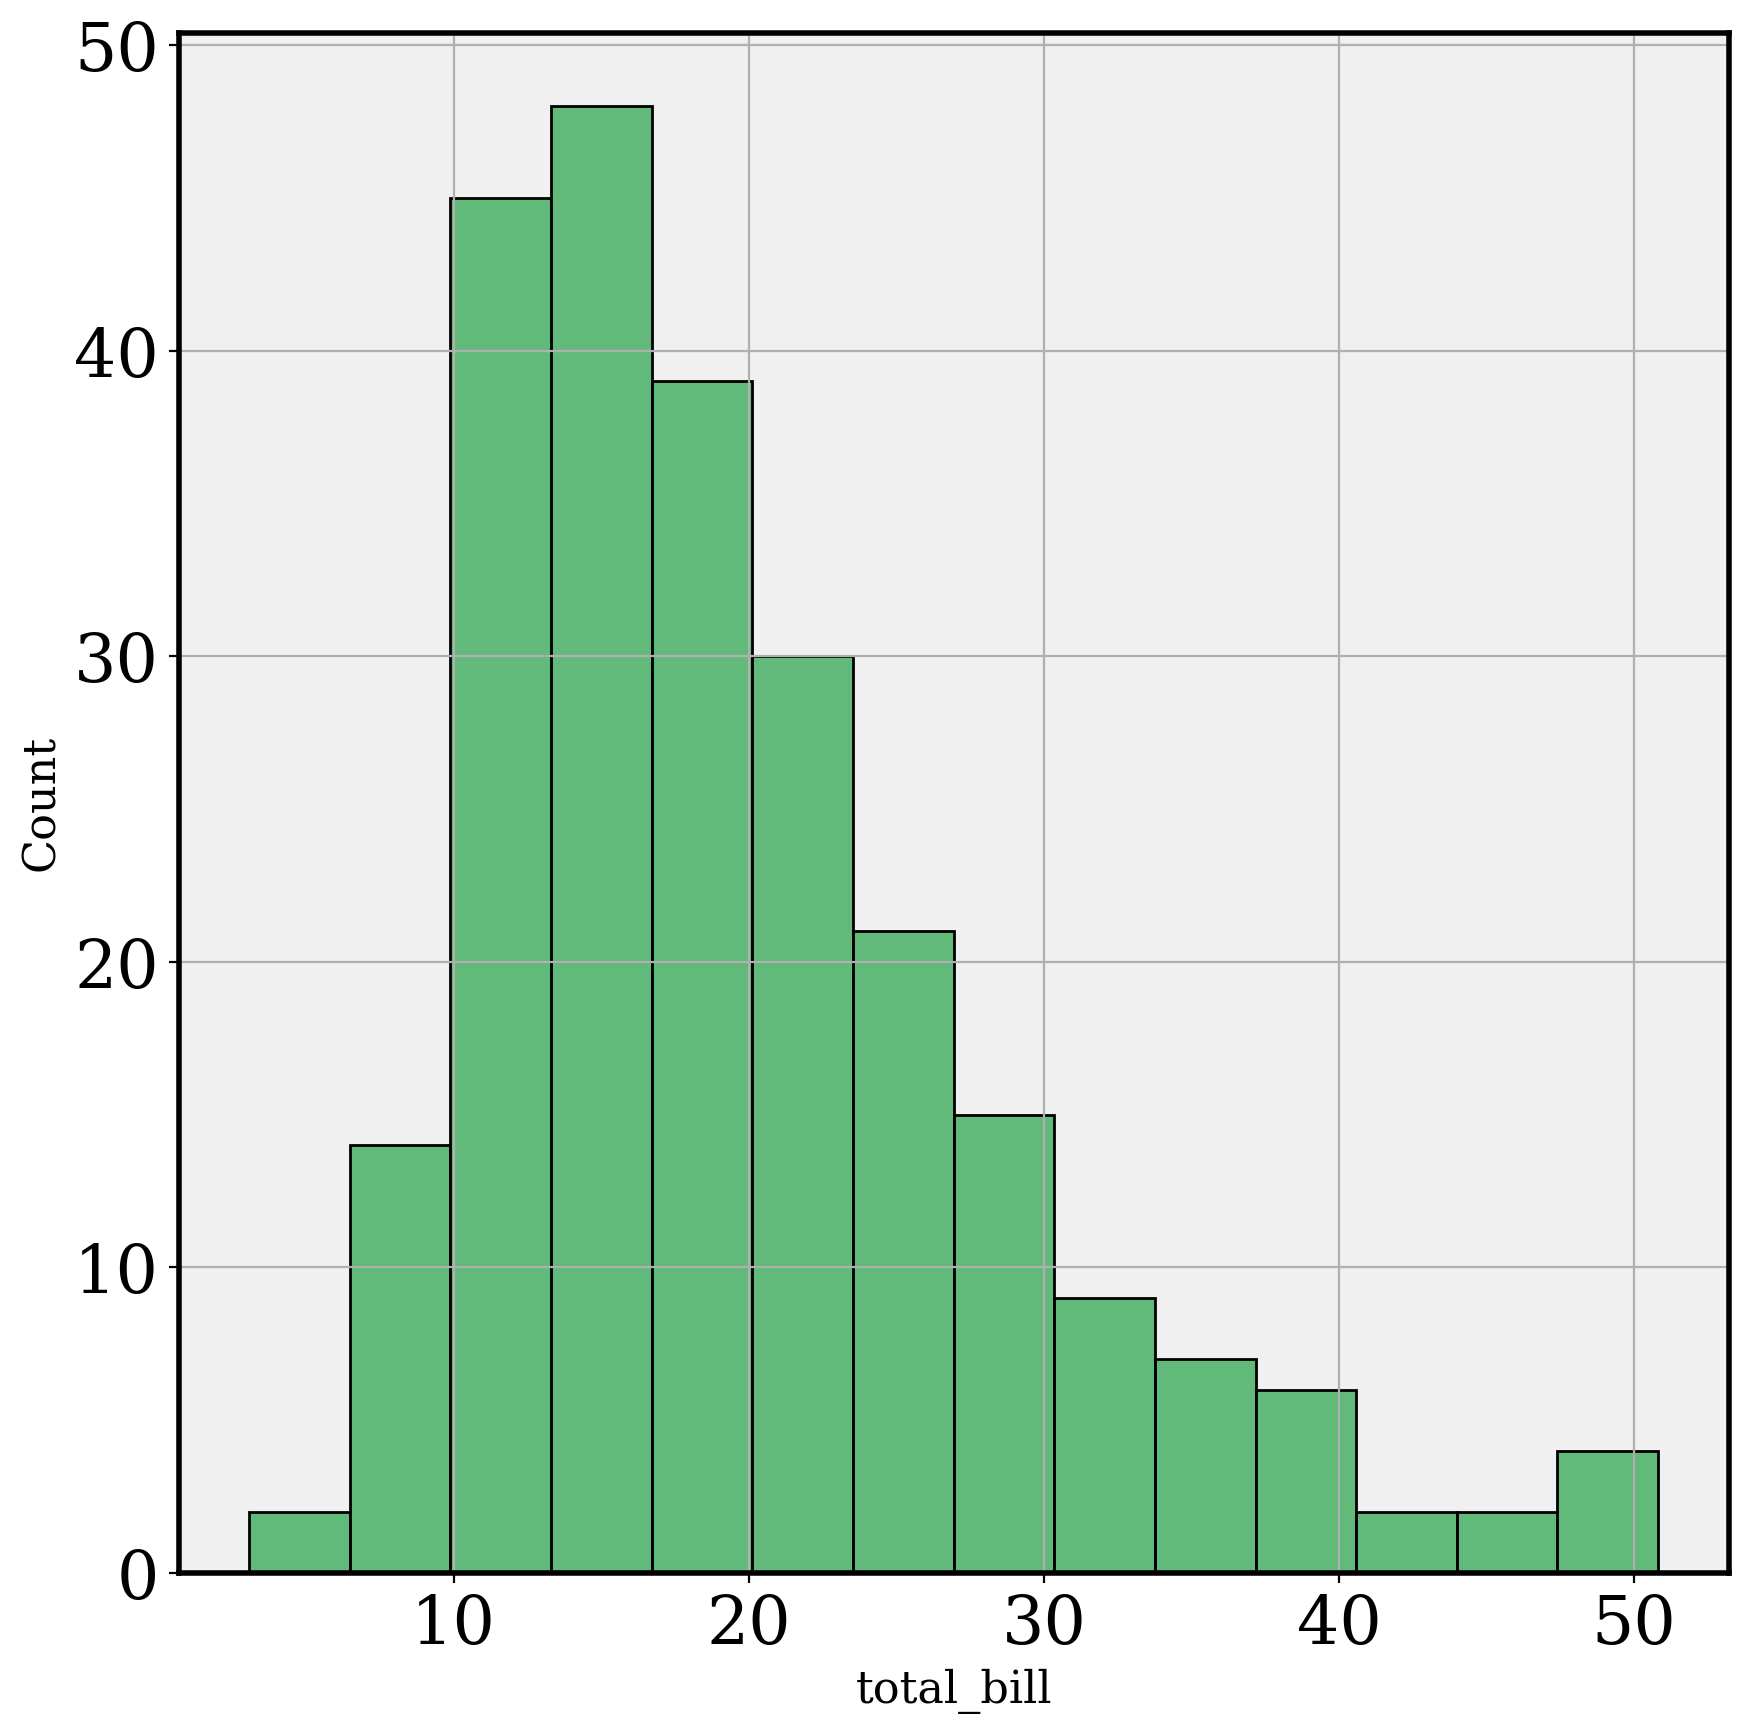

In [28]:
sns_plot()

In [29]:
# RESET BACK TO DEFAULTS
plt.rcParams.update(plt.rcParamsDefault)
# or
# sns.reset_defaults()

In [30]:
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

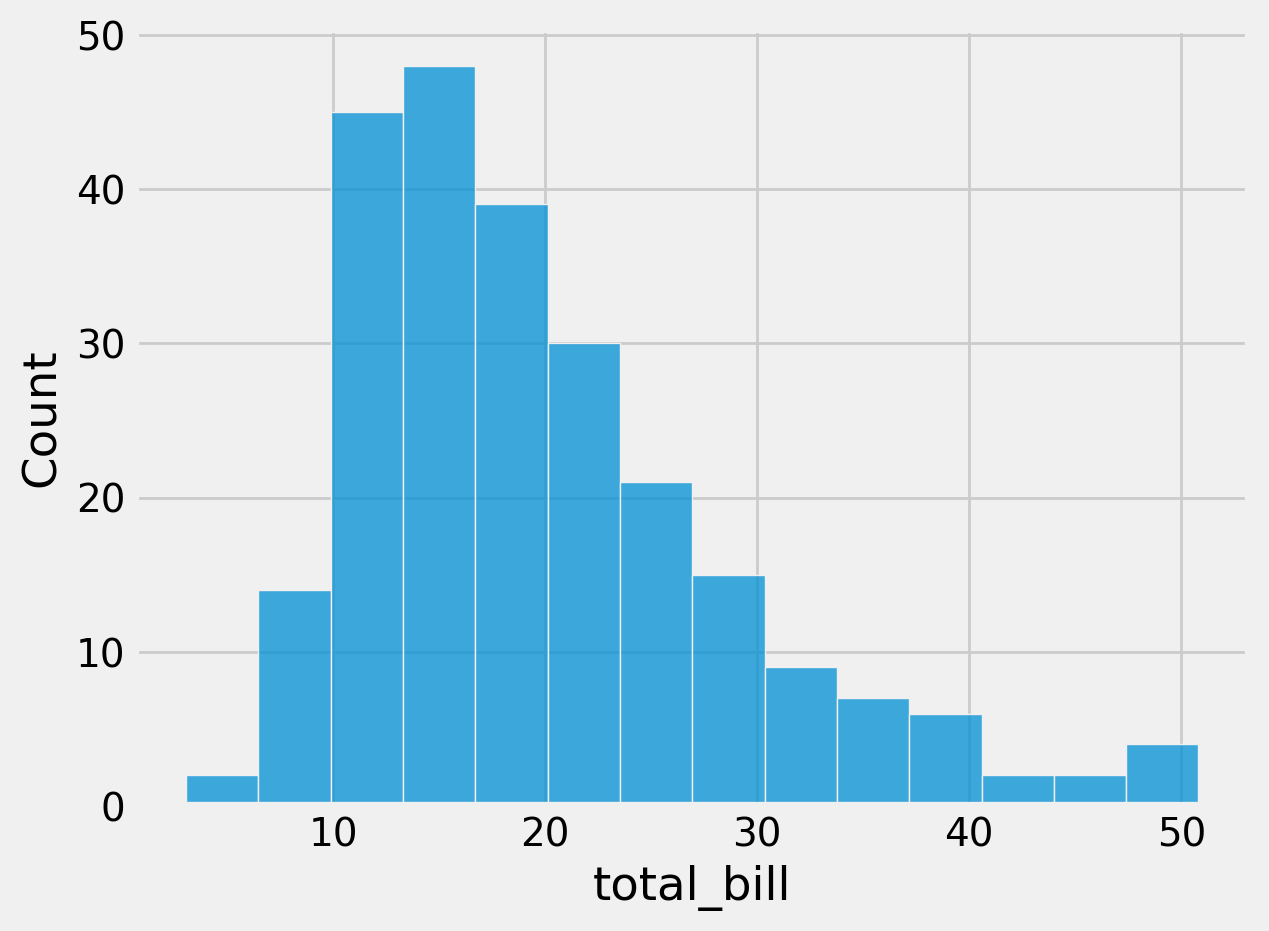

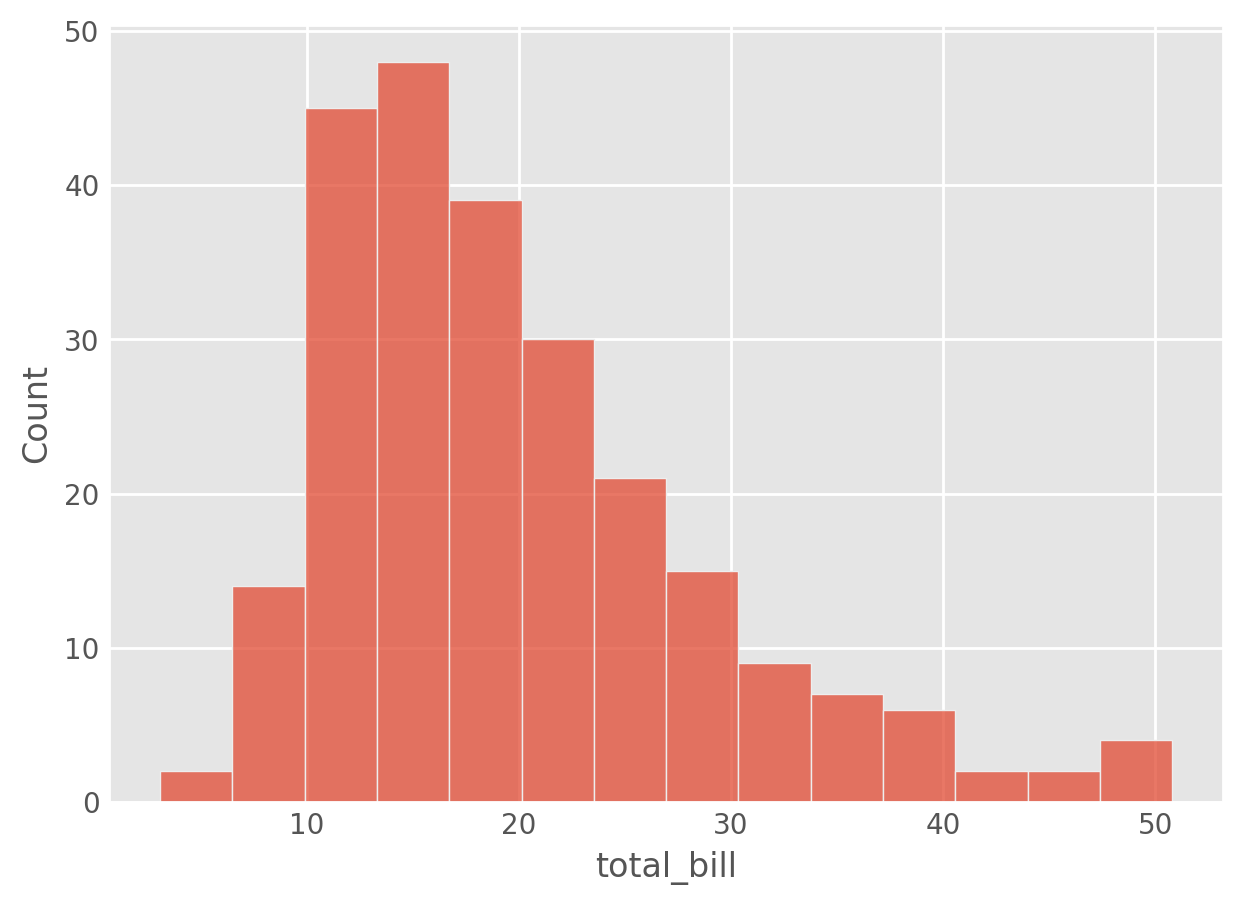

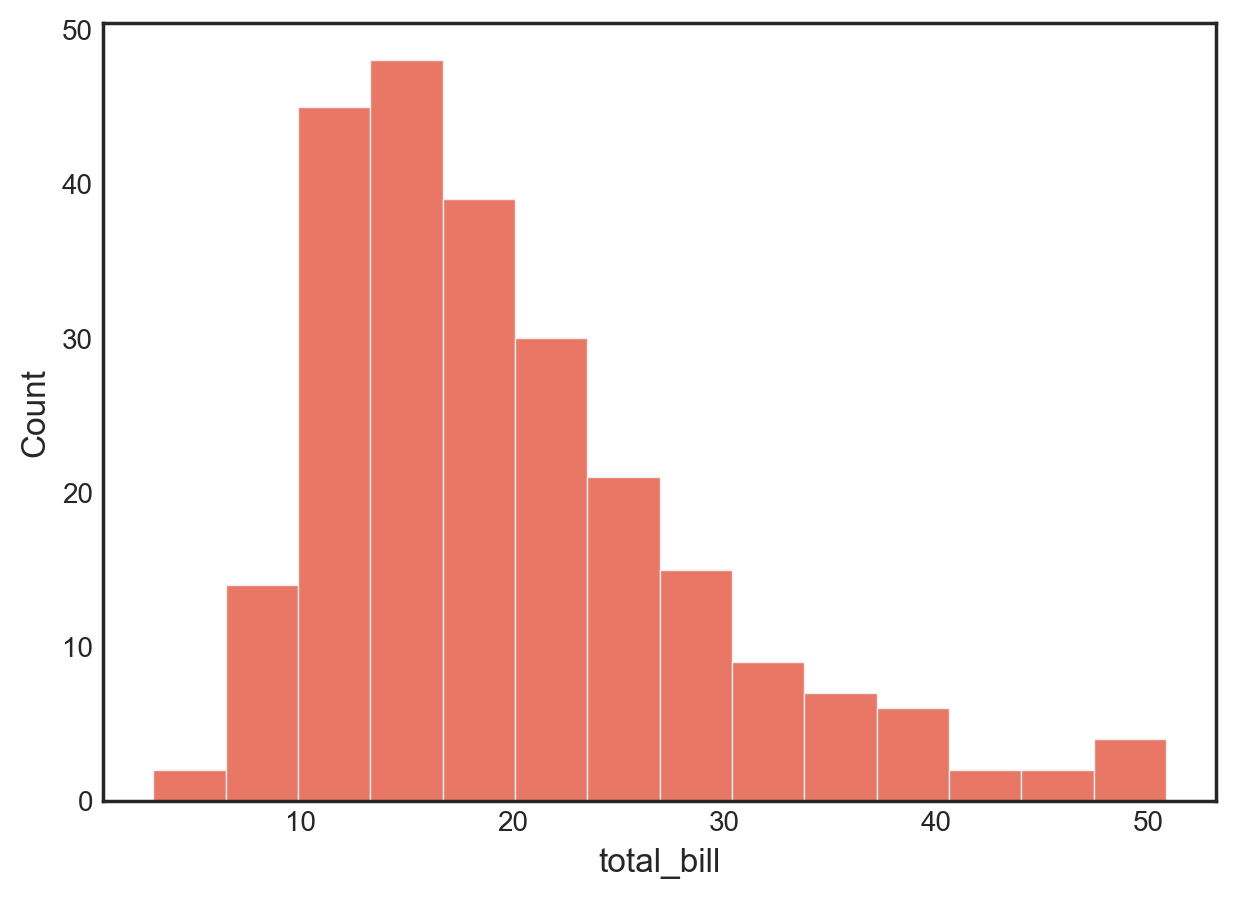

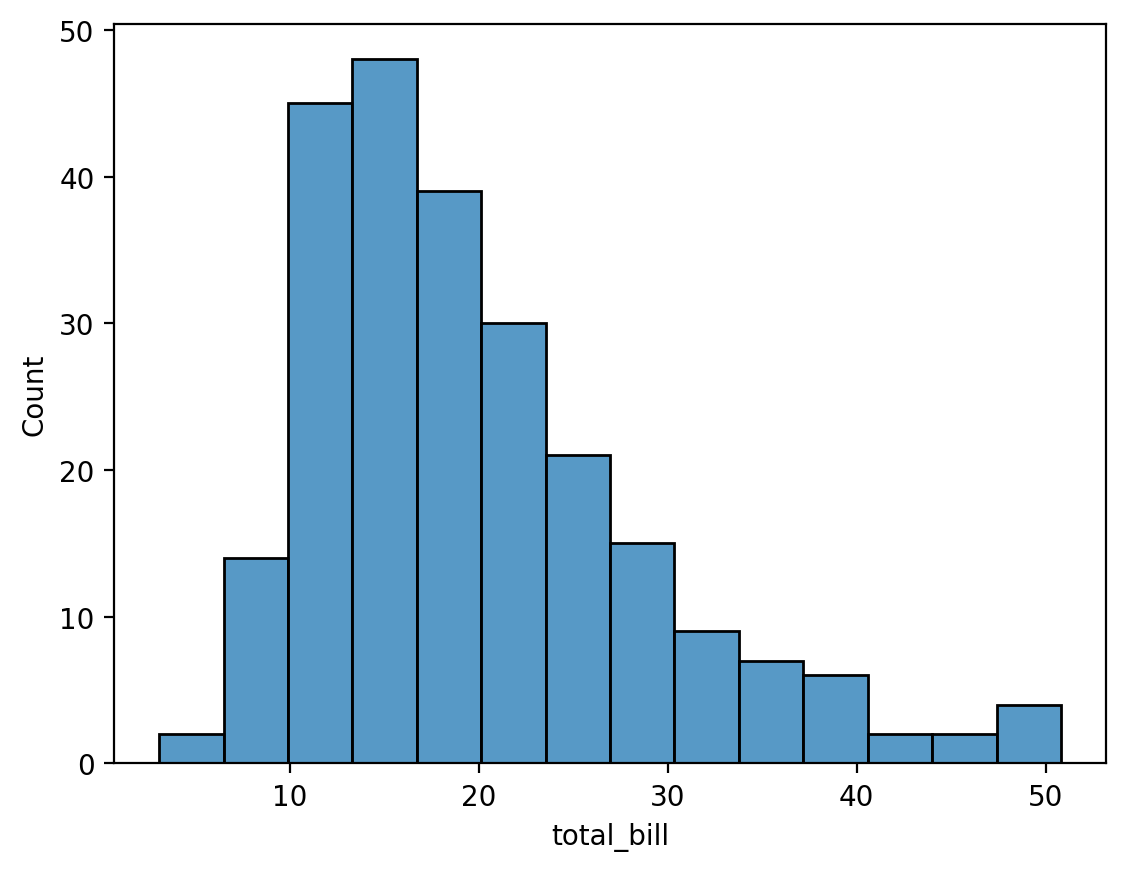

In [31]:
plt.style.use("fivethirtyeight")
sns_plot()

plt.style.use("ggplot")
sns_plot()

plt.style.use("seaborn-v0_8-white")
sns_plot()

plt.style.use("default")  # revert to default
sns_plot()

In [32]:
def changed_rcParams(style):
  if style not in mpl.style.available:
    raise ValueError("This function only works with pre-built MPL styles")
  rc_orig = mpl.rcParamsDefault # default
  plt.style.use(style)
  rc_style = mpl.rcParams
  output = {k: rc_style[k] for k in rc_style if rc_style[k] != rc_orig[k]}
  return output

changed_rcParams('ggplot')

{'axes.axisbelow': True,
 'axes.edgecolor': 'white',
 'axes.facecolor': '#E5E5E5',
 'axes.grid': True,
 'axes.labelcolor': '#555555',
 'axes.labelsize': 'large',
 'axes.linewidth': 1.0,
 'axes.prop_cycle': cycler('color', ['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']),
 'axes.titlesize': 'x-large',
 'figure.edgecolor': '0.50',
 'grid.color': 'white',
 'patch.edgecolor': '#EEEEEE',
 'patch.facecolor': '#348ABD',
 'patch.linewidth': 0.5,
 'xtick.color': '#555555',
 'ytick.color': '#555555'}

In [33]:
def changed_sns_style(style):
  if style not in ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']:
    raise ValueError("This function only works with pre-built seaborn styles")
  rc_orig = mpl.rcParamsDefault
  sns.set_style(style)
  rc_style = sns.axes_style()
  output = {k: rc_style[k] for k in rc_style if rc_style[k] != rc_orig[k]}
  return output

changed_sns_style("white")

{'axes.edgecolor': '.15',
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'grid.color': '.8',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'ytick.left': False}

In [34]:
mpl.rcParams.find_all('title')

RcParams({'axes.titlecolor': 'auto',
          'axes.titlelocation': 'center',
          'axes.titlepad': 6.0,
          'axes.titlesize': 'x-large',
          'axes.titleweight': 'normal',
          'axes.titley': None,
          'figure.titlesize': 'large',
          'figure.titleweight': 'normal',
          'legend.title_fontsize': None})

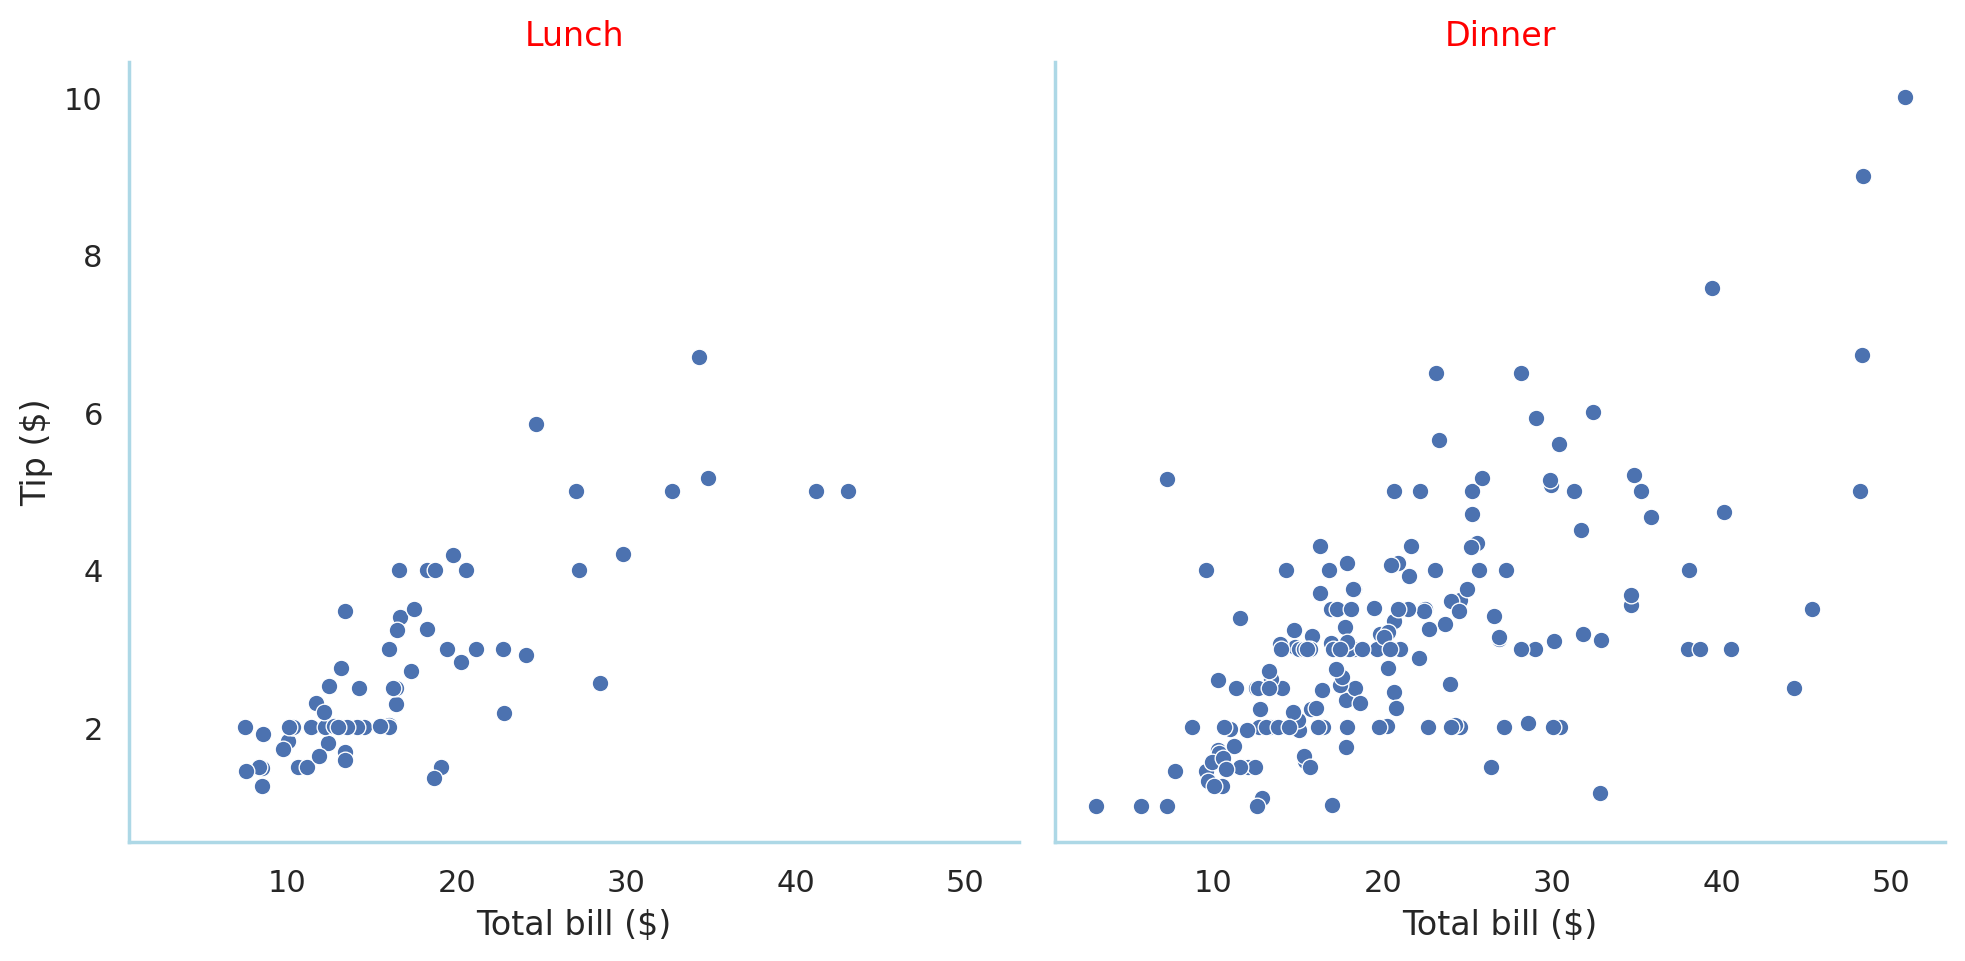

In [35]:
sns.set_theme(style='white')
mpl.rcParams['text.color'] = 'red'
mpl.rcParams['font.sans-serif'] = 'DejaVu Sans'
mpl.rcParams['axes.edgecolor'] = "lightblue"
sns_plot2()

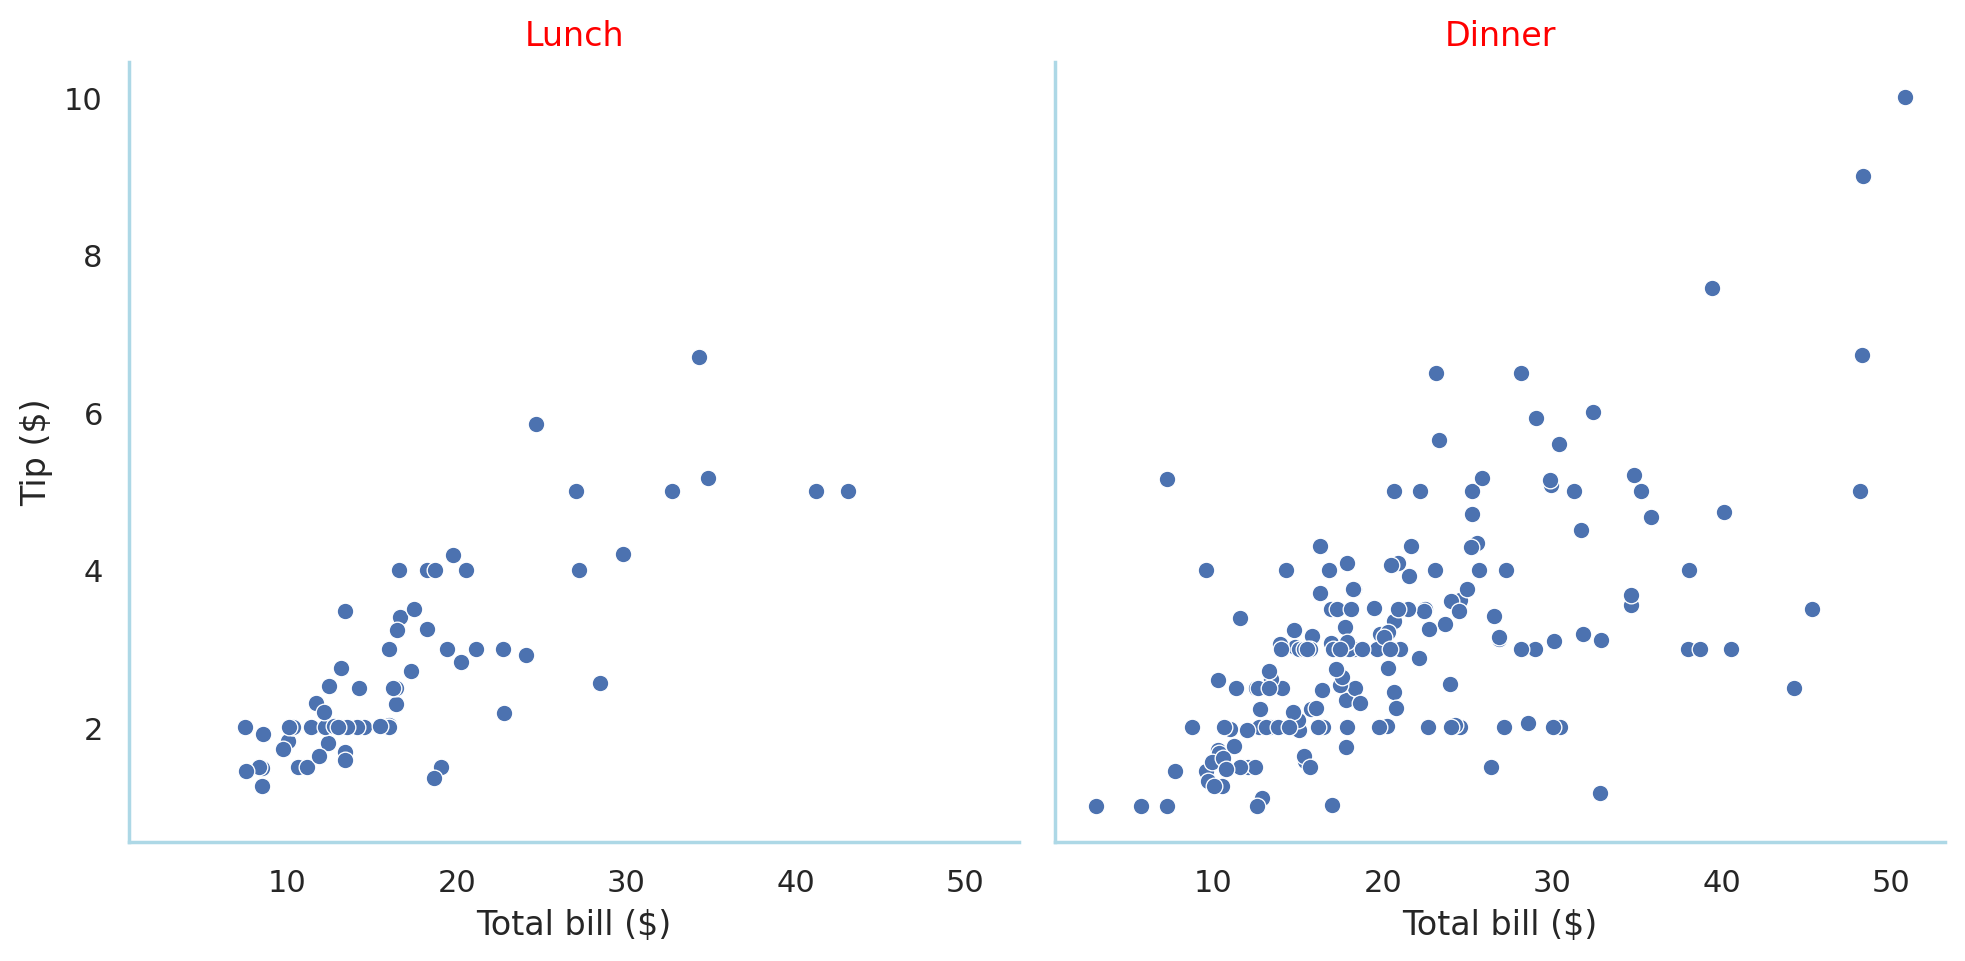

In [36]:
sns.set_style(
    style='white', #<1>
    rc = {                                              #<2>
      'text.color': 'red', 'font.sans-serif': 'DejaVu Sans',
      'axes.edgecolor': 'lightblue'
      } #<2>
)
sns_plot2()

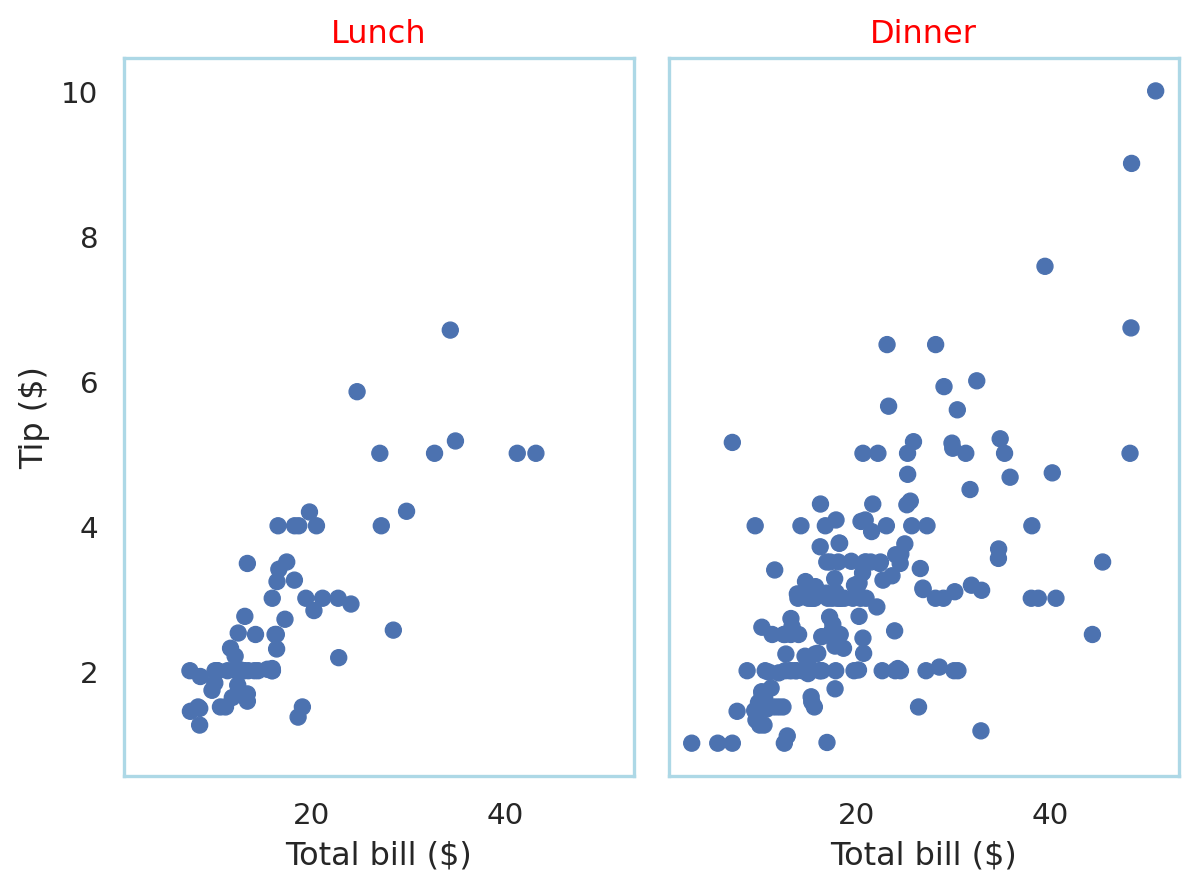

In [37]:
sns_plt.theme(
    sns.axes_style(
      style='white',
      rc = {
        'text.color': 'red', 'font.sans-serif': 'DejaVu Sans',
        'axes.edgecolor': 'lightblue'
      }
  )

)

In [38]:
# RESET BACK TO DEFAULTS
plt.rcParams.update(plt.rcParamsDefault)

In [39]:
from pathlib import Path

cfgdir = mpl.get_configdir()  # find your configuration folder
p = Path(cfgdir)
stylelib = p / "stylelib"
stylelib.mkdir(exist_ok=True)
path = stylelib / "mycustomstyle.mplstyle"  # create paths
path.write_text(
    """ # write into the file
axes.facecolor : f0f0f0
font.family : serif
lines.linewidth : 5
xtick.labelsize : 24
ytick.labelsize : 24
"""
)

129

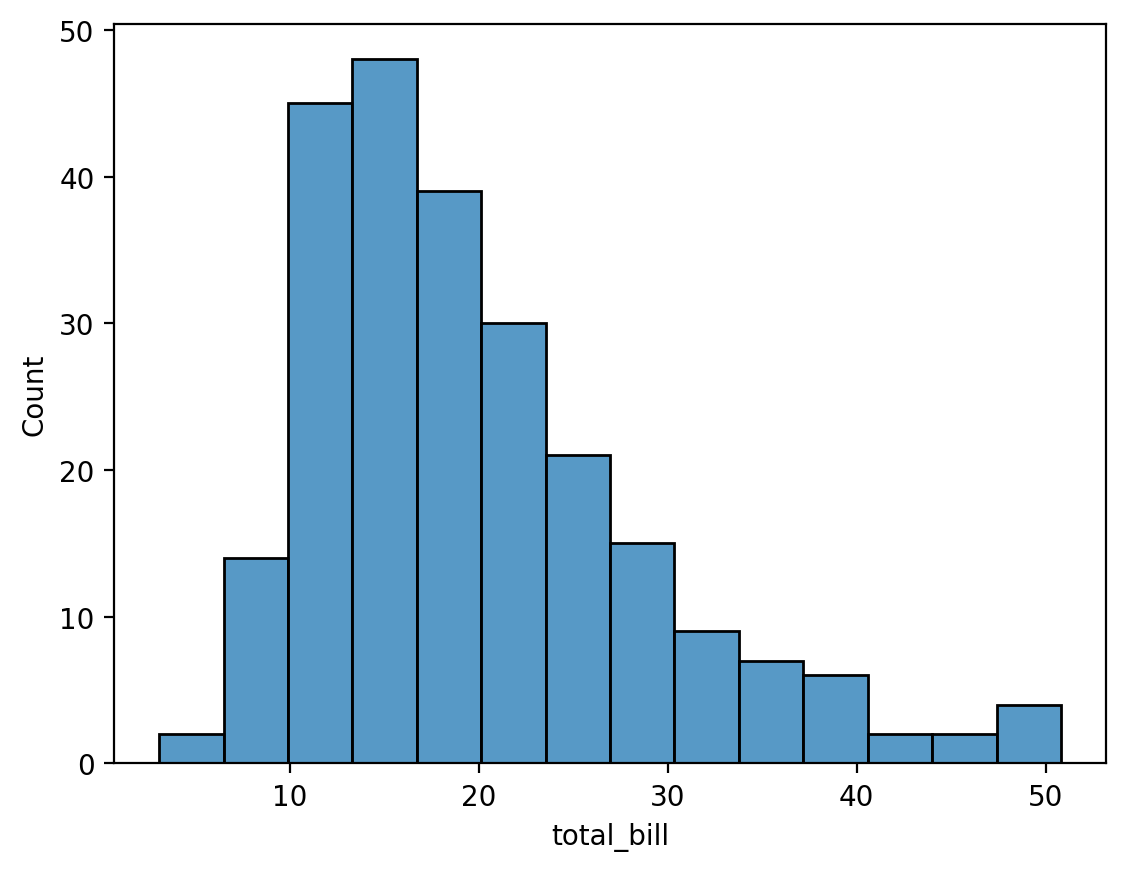

In [40]:
# BEFORE
sns_plot()

In [41]:
# LOAD STYLE
plt.style.reload_library()
print("mycustomstyle" in plt.style.available)

True


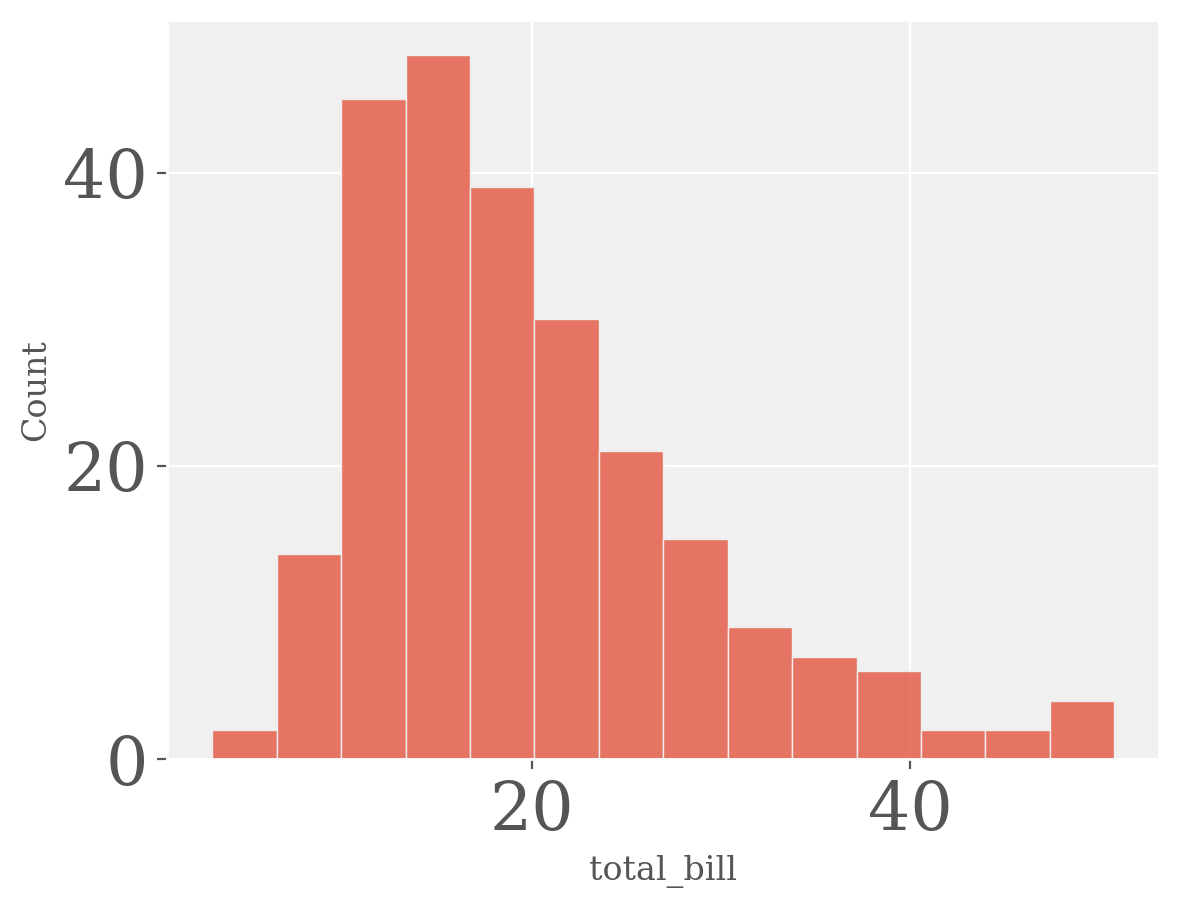

In [42]:
# AFTER
plt.style.use(["ggplot", "mycustomstyle"])
sns_plot()

In [43]:
mpl.rcParams.find_all("^grid")

RcParams({'grid.alpha': 1.0,
          'grid.color': 'white',
          'grid.linestyle': '-',
          'grid.linewidth': 0.8})

In [44]:
plt.rcParams.update(plt.rcParamsDefault)

In [45]:
white_style=dict( #<1>
  sns.axes_style(
    style='white',
    rc = {
      'text.color': 'red', 'font.sans-serif': 'DejaVu Sans',
      'axes.edgecolor': 'lightblue'
      }
  )
) #<1>
path = stylelib / "white_custom.mplstyle"
with open(path, 'w') as f: #<2>
  for key, value in white_style.items():
    f.write("%s : %s\n" % (key, value))
#<2>
plt.style.reload_library()
print('white_custom' in plt.style.available)

True


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


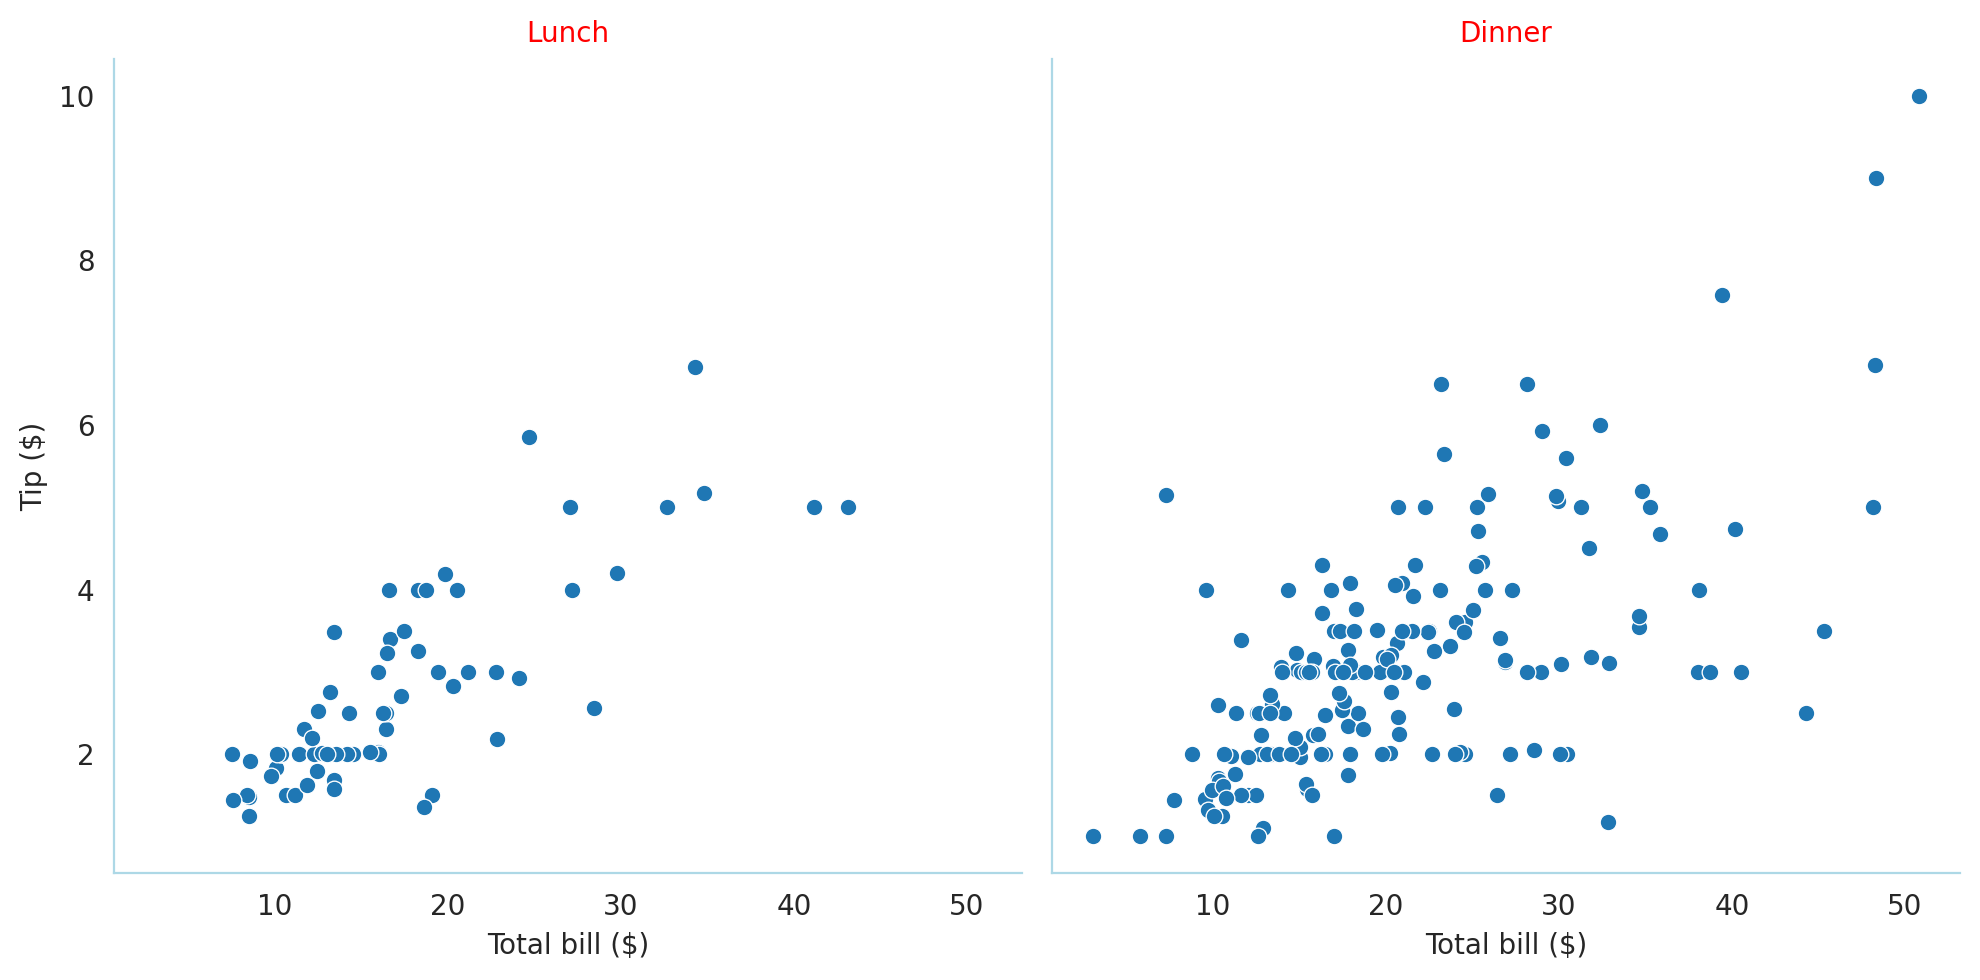

In [46]:
plt.style.use('white_custom')
sns_plot2()

findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


findfont: Font family "['sans-serif']" not found.


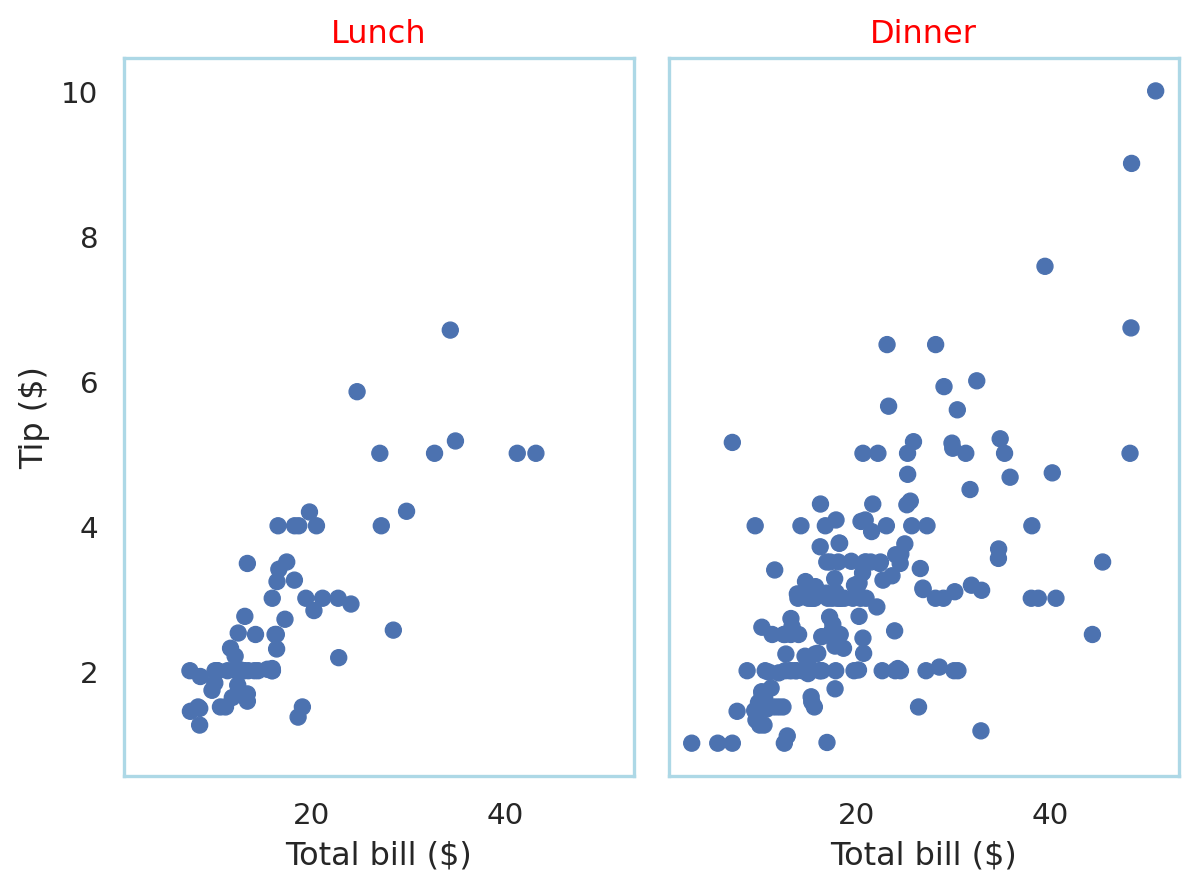

In [47]:
sns_plt.theme(mpl.style.library['white_custom'])

Bad value in file PosixPath('/Users/abhijit/.matplotlib/stylelib/mpl_custom.mplstyle'), line 5 ("axes.prop_cycle : cycler('color', ['#32a852', 'r', 'b', 'y'])"): Key axes.prop_cycle: "cycler('color', ['" is not a valid cycler construction: unterminated string literal (detected at line 1) (<unknown>, line 1)


True


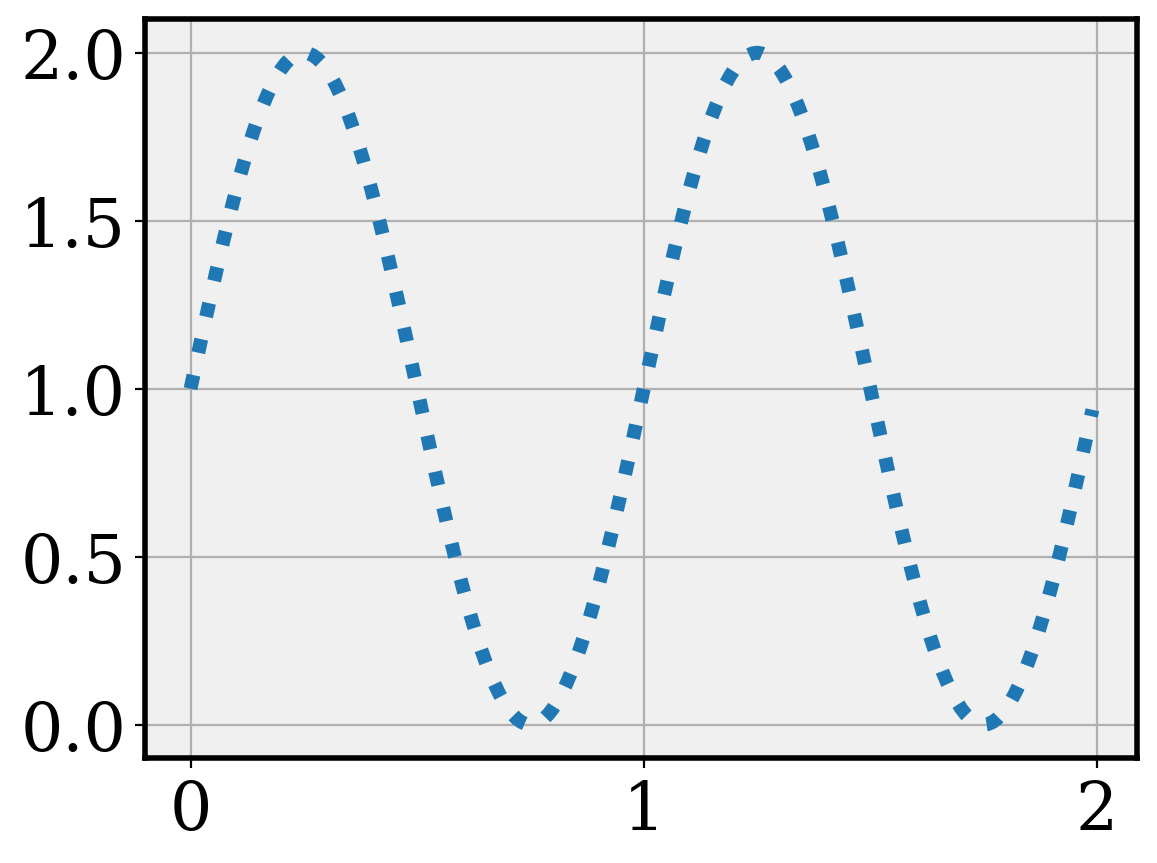

In [48]:
d = dict()
d["axes.grid"] = True
d["axes.linewidth"] = 2
d["lines.linewidth"] = 4
d["lines.linestyle"] = "dotted"
# change the order in which colors are chosen
d["axes.prop_cycle"] = plt.cycler(color=["#32a852", "r", "b", "y"])
d["font.size"] = 16
d["axes.facecolor"] = "f0f0f0"
d["font.family"] = "serif"
d["lines.linewidth"] = 5
d["xtick.labelsize"] = 24
d["ytick.labelsize"] = 24


path = stylelib / "mpl_custom.mplstyle"
with open(path, 'w') as f:
  for key, value in d.items():
    f.write("%s : %s\n" % (key, value))

plt.rcParams.update(plt.rcParamsDefault)
plt.style.reload_library()
print('mpl_custom' in plt.style.available)

plt.style.use('mpl_custom')
mpl_plot()

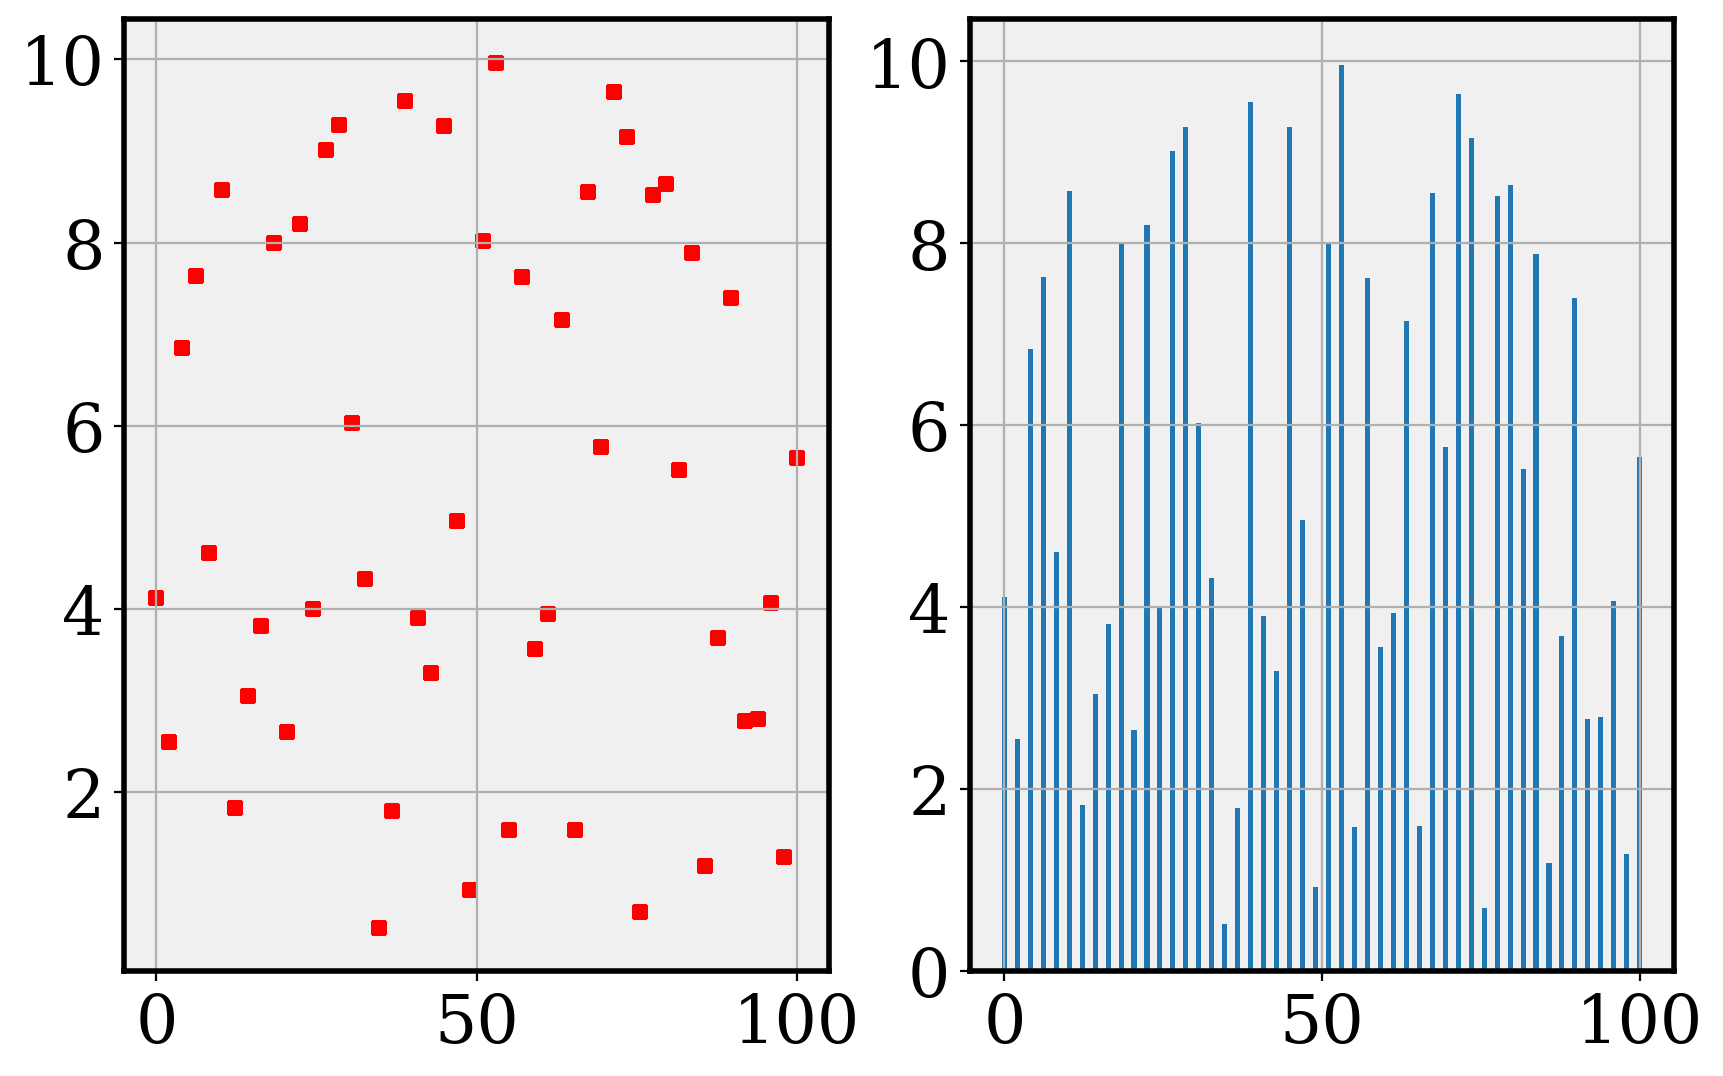

In [49]:
x = np.linspace(0, 100, 50)
y = np.random.uniform(low=0, high=10, size=50)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10 / 1.618))
ax1.scatter(x, y, c="red", marker="+")
ax2.bar(x, y)
plt.show()

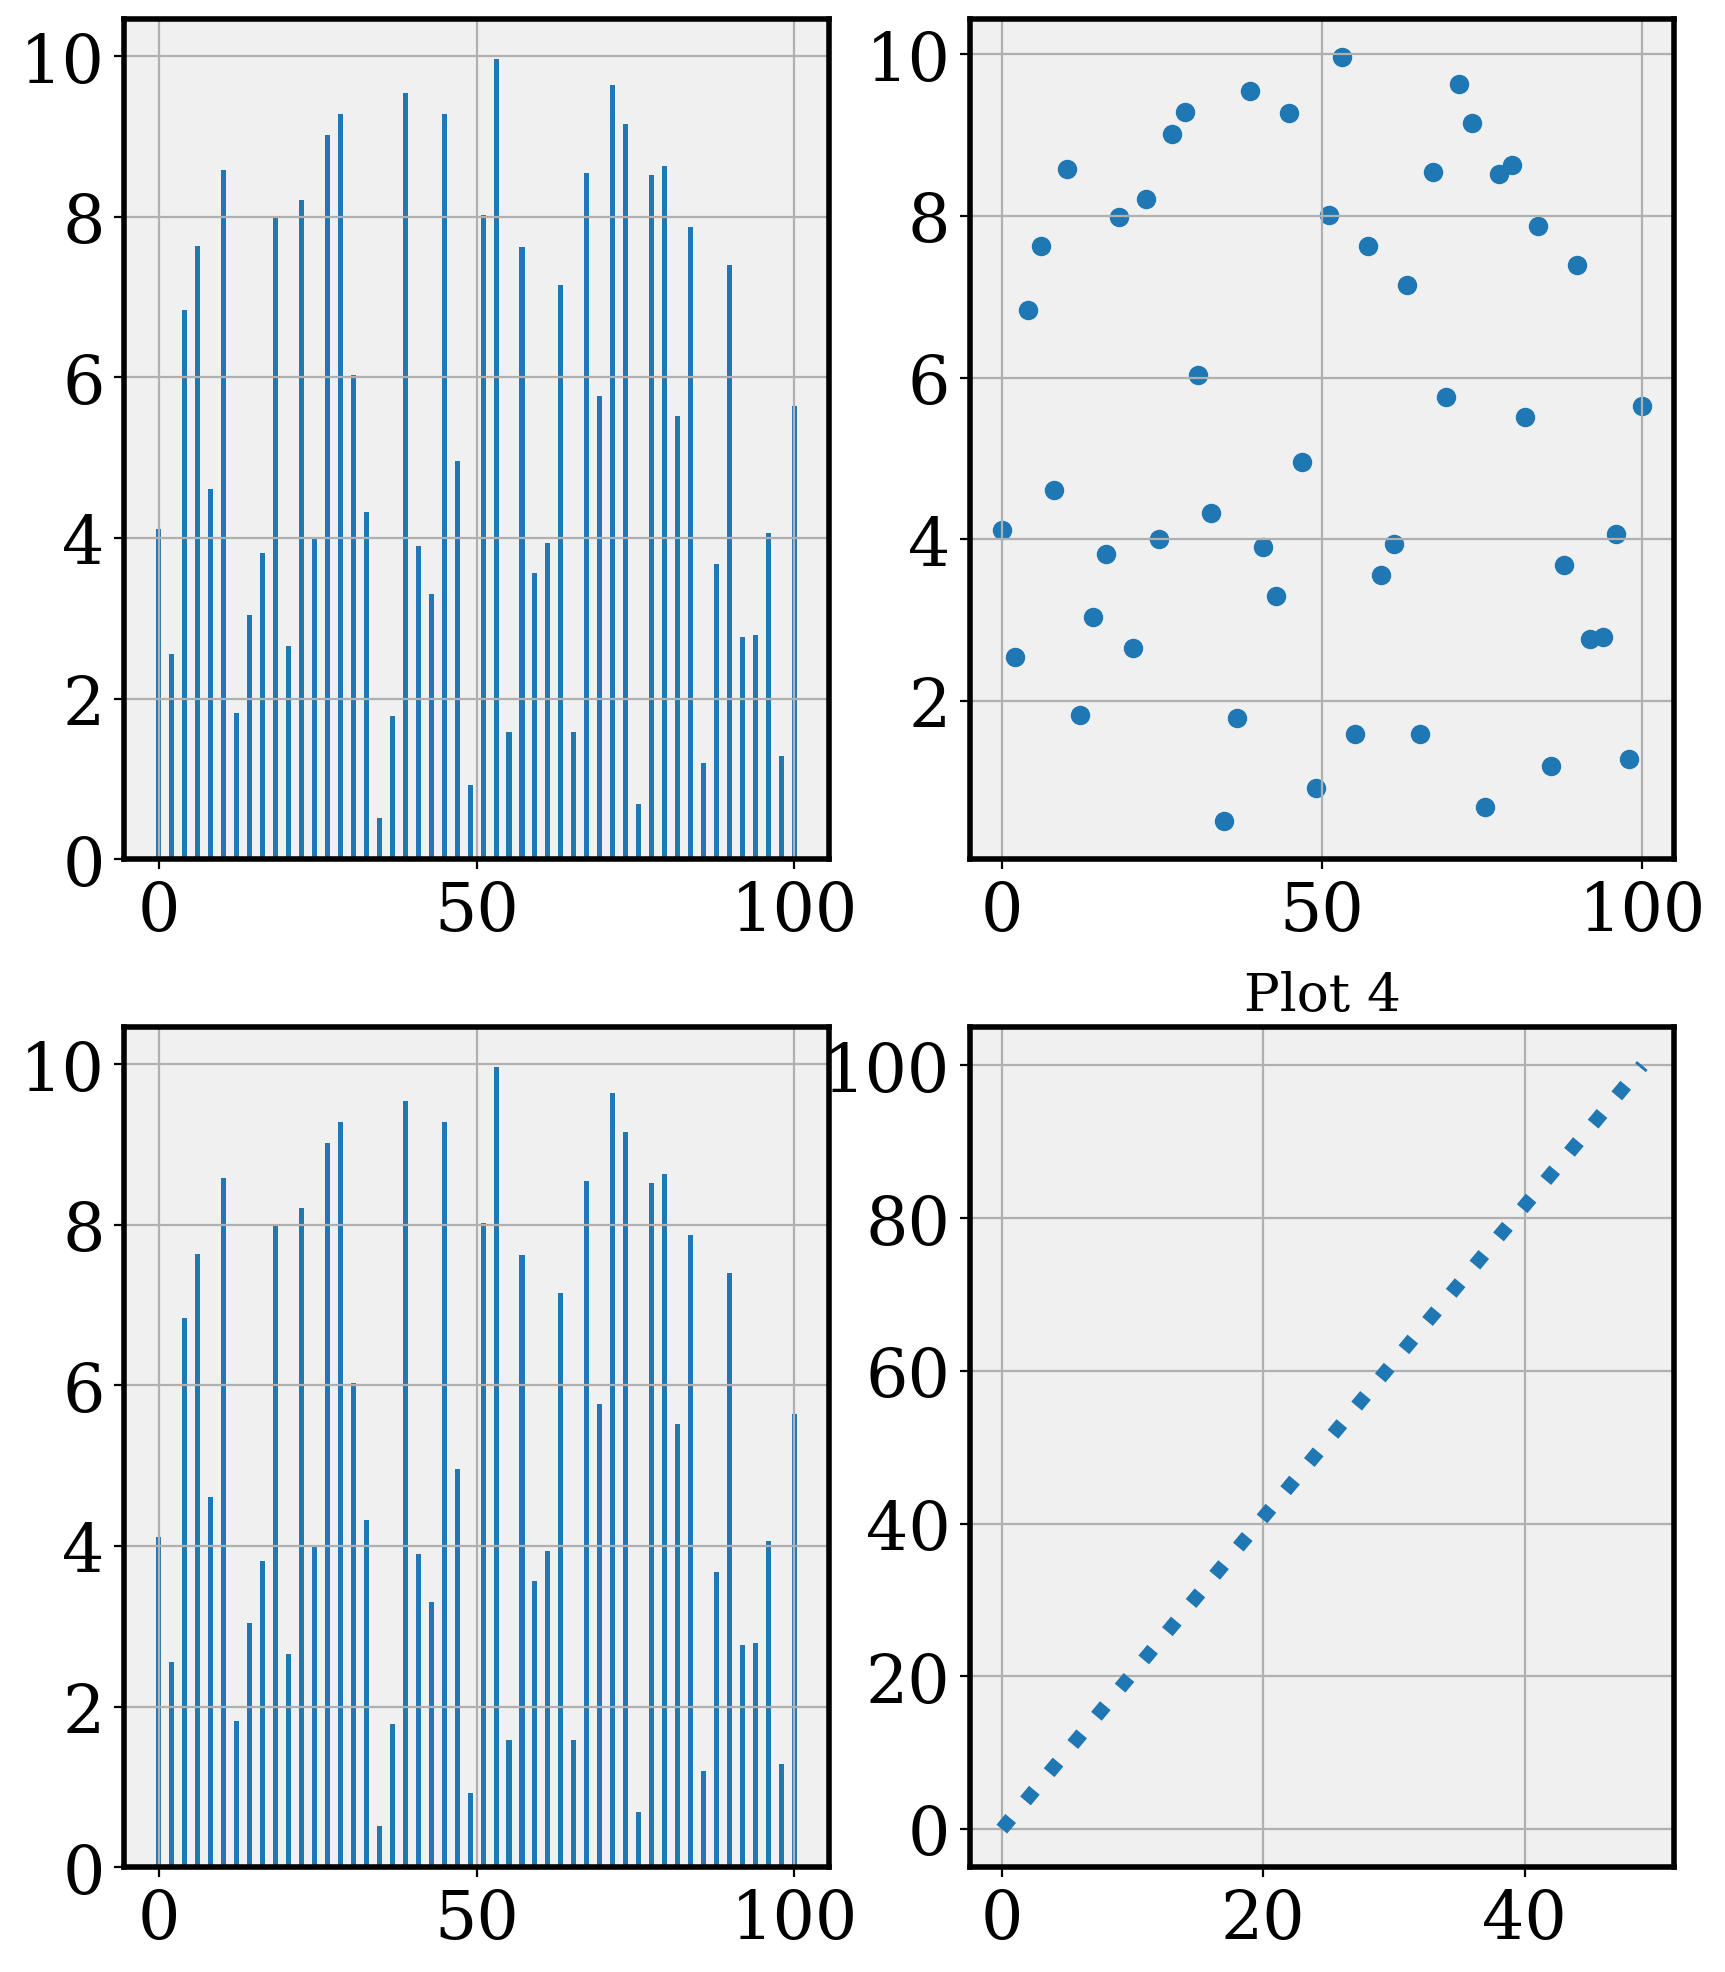

In [50]:
fig, ax = plt.subplots(2, 2, figsize=(10, 12))
ax[0, 0].bar(x, y)
ax[1, 0].bar(x, y)
ax[0, 1].scatter(x, y)
ax[1, 1].plot(x)
ax[1, 1].set_title("Plot 4")
plt.show()

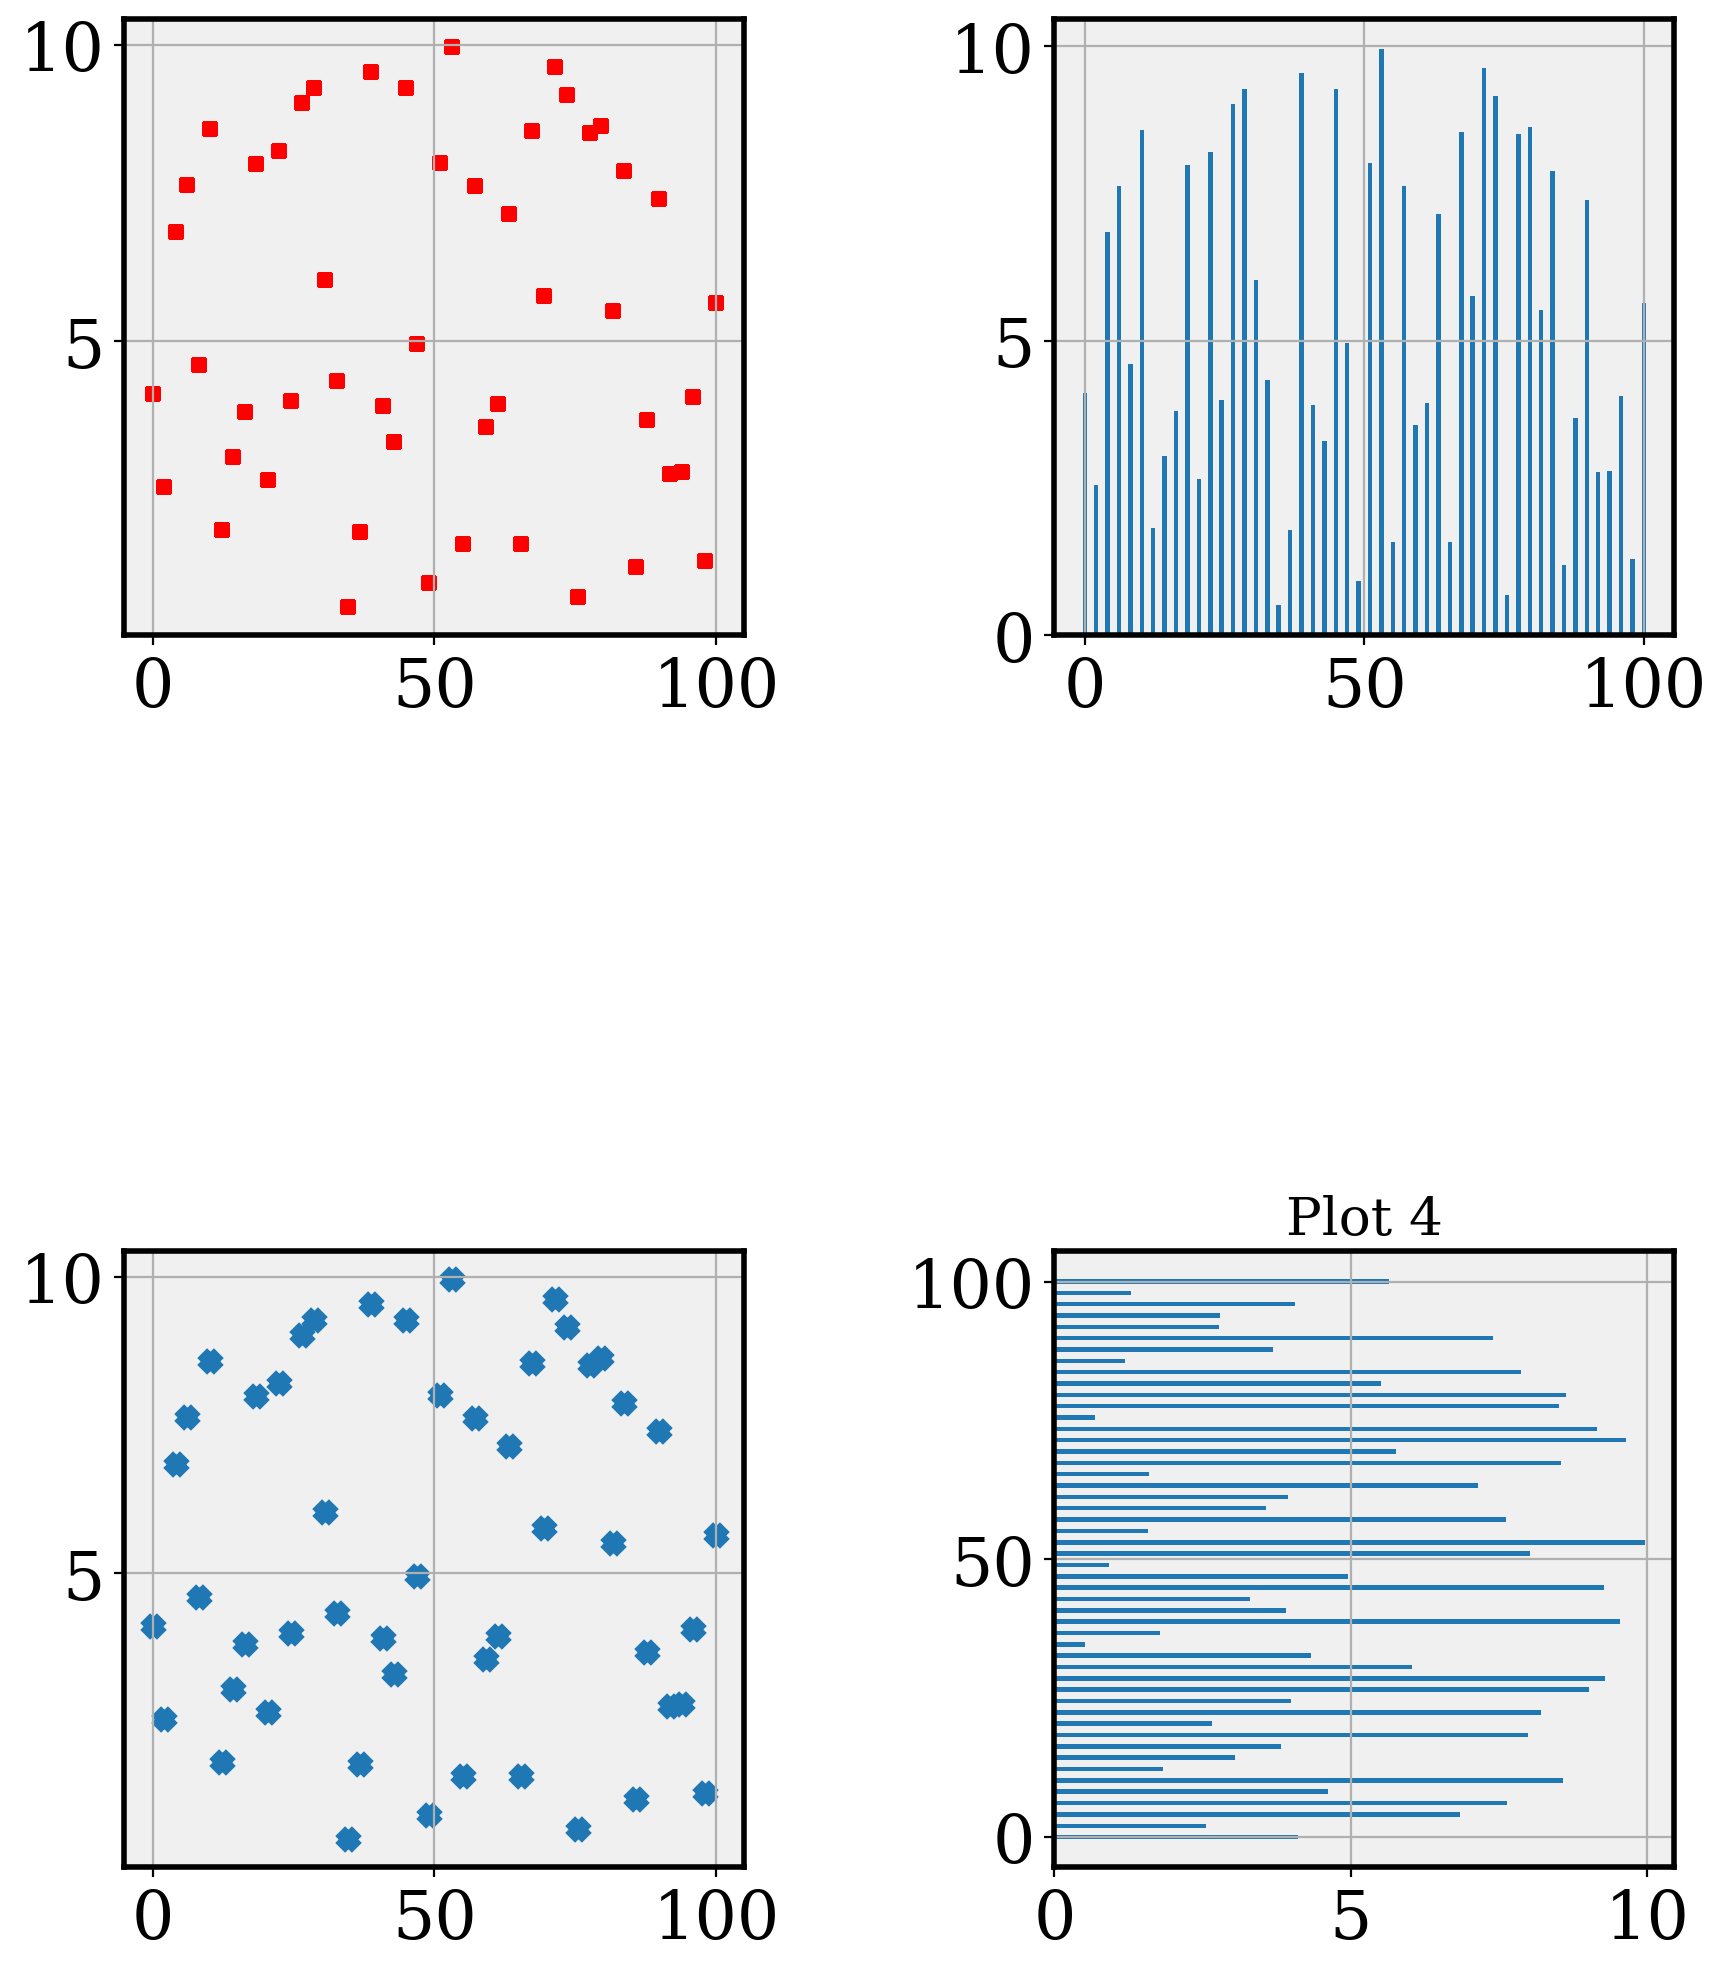

In [51]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax1.scatter(x, y, c="red", marker="+")
ax2.bar(x, y)
ax3.scatter(x, y, marker="x")
ax4.barh(x, y)
ax4.set_title("Plot 4")
plt.subplots_adjust(wspace=0.5, hspace=1.0)
plt.show()

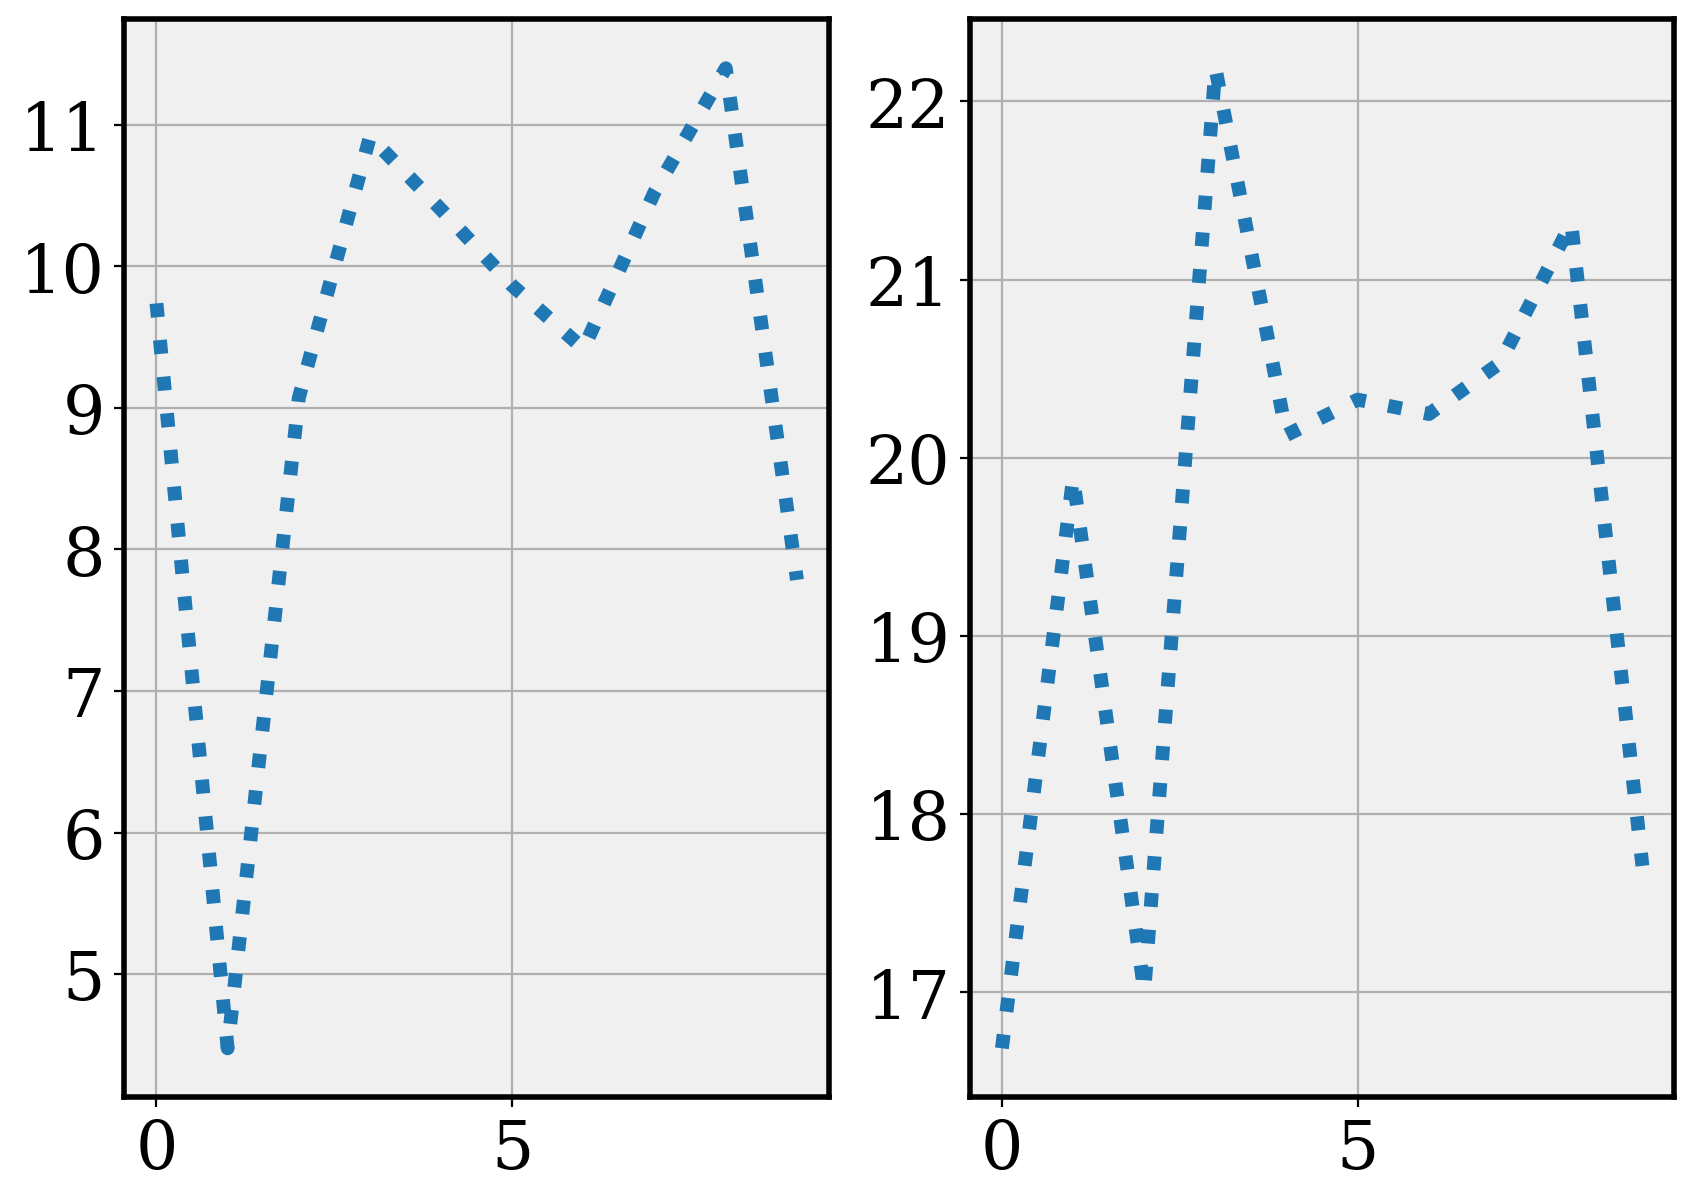

In [52]:
x = np.linspace(0, 100, 50)
y1 = np.random.normal(loc=10, scale=2, size=10)
y2 = np.random.normal(loc=20, scale=2, size=10)
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 7))
ax1.plot(y1)
ax2.plot(y2)
plt.show()

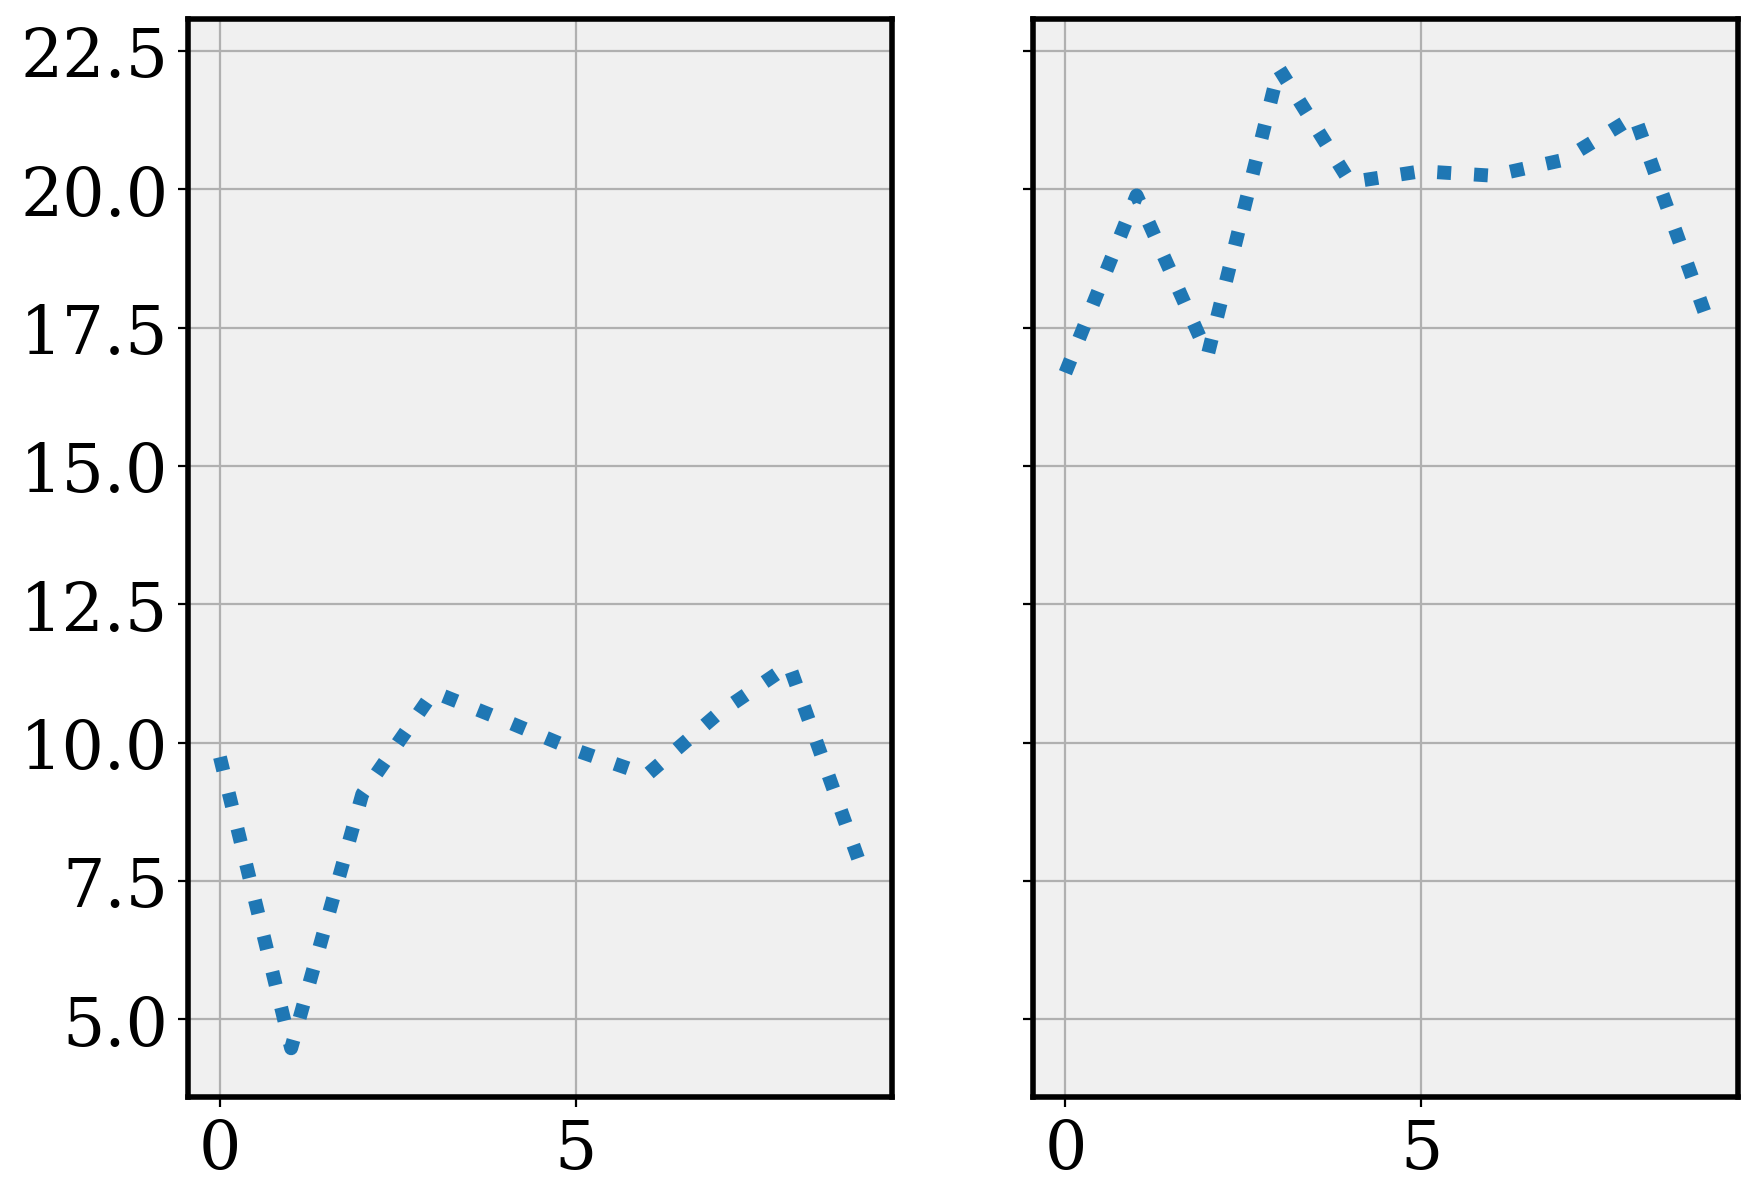

In [53]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(10, 7), sharey=True)
ax1.plot(y1)
ax2.plot(y2)
plt.show()

In [54]:
def set_size(width):
    """Set aesthetic figure dimensions following golden ratio
    Args:
        width (float): width of the figure in inches (what matplotlib uses)
    Returns:
        fig_dim (tuple): Dimensions of the figure in inches
    """
    golden_ratio = (5**0.5 - 1) / 2
    fig_height = width * golden_ratio
    return width, fig_height

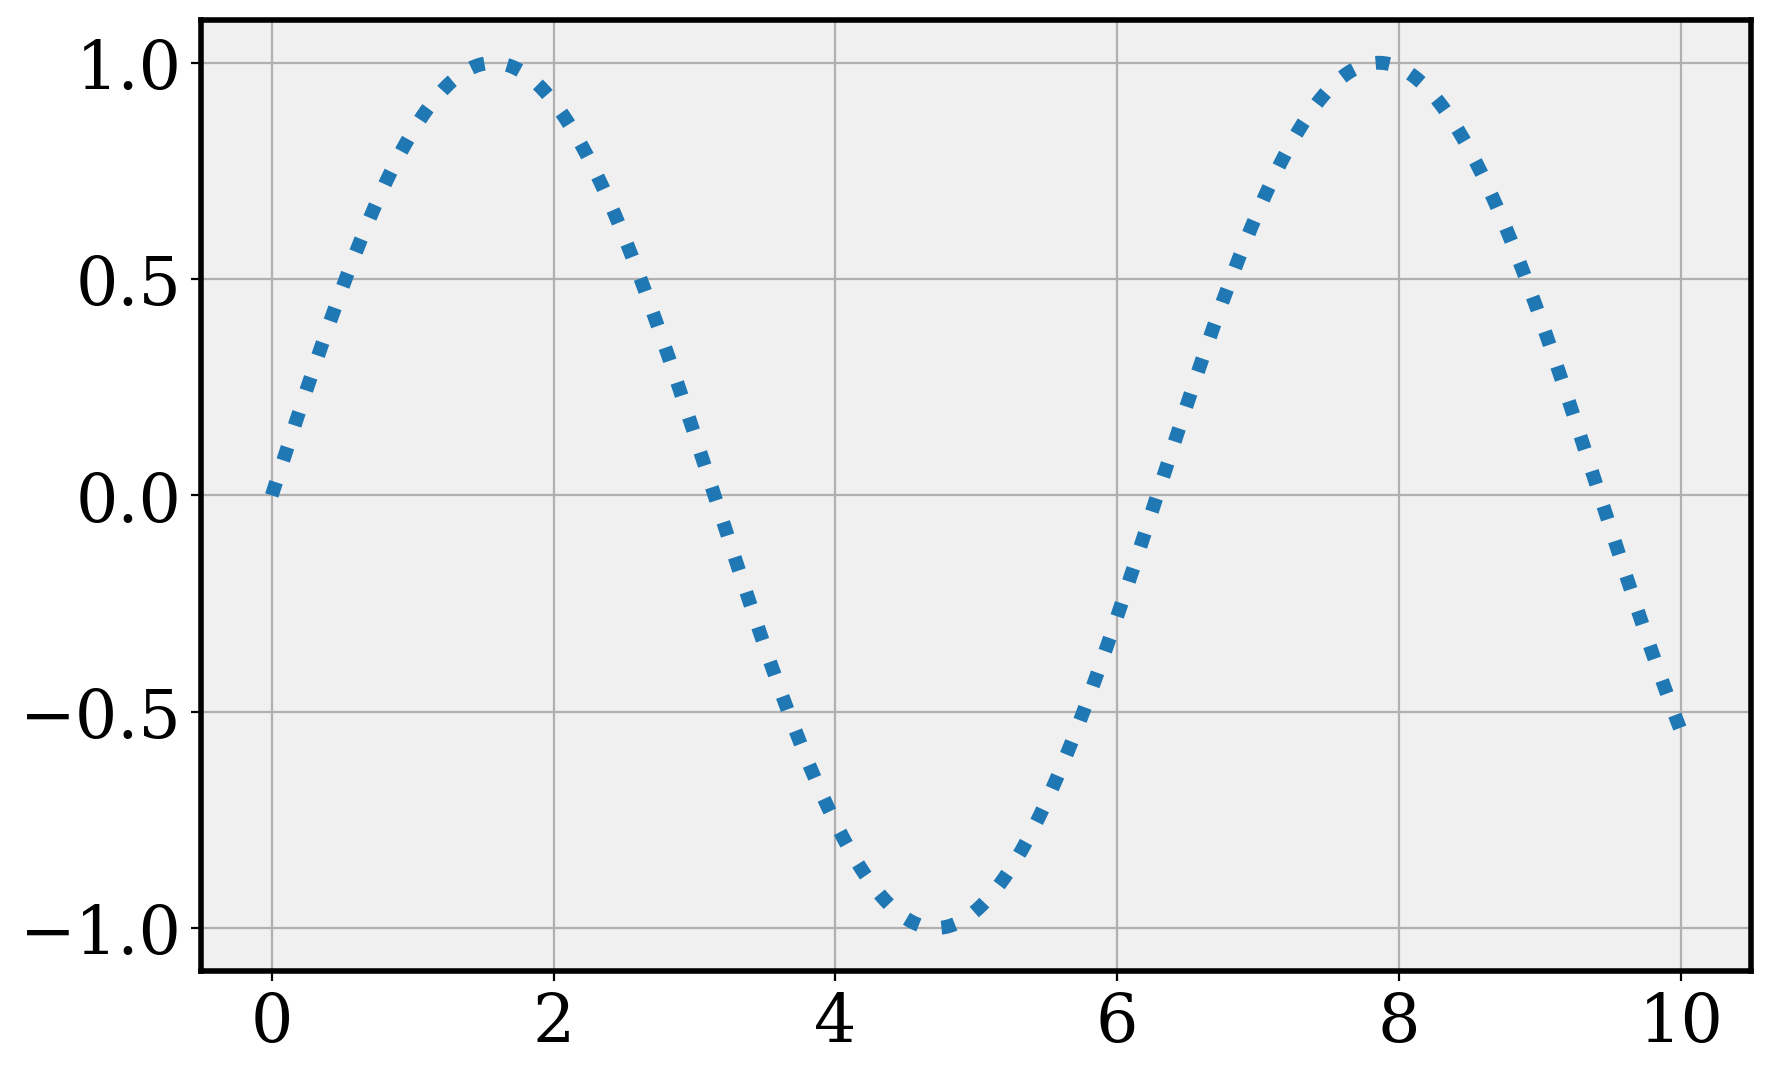

In [55]:
x = np.linspace(0, 10, num=1000)
fig, ax = plt.subplots(figsize=set_size(10))
ax.plot(x, np.sin(x))
plt.show()

In [56]:
plt.rcParams.update(plt.rcParamsDefault) # reset parameters
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

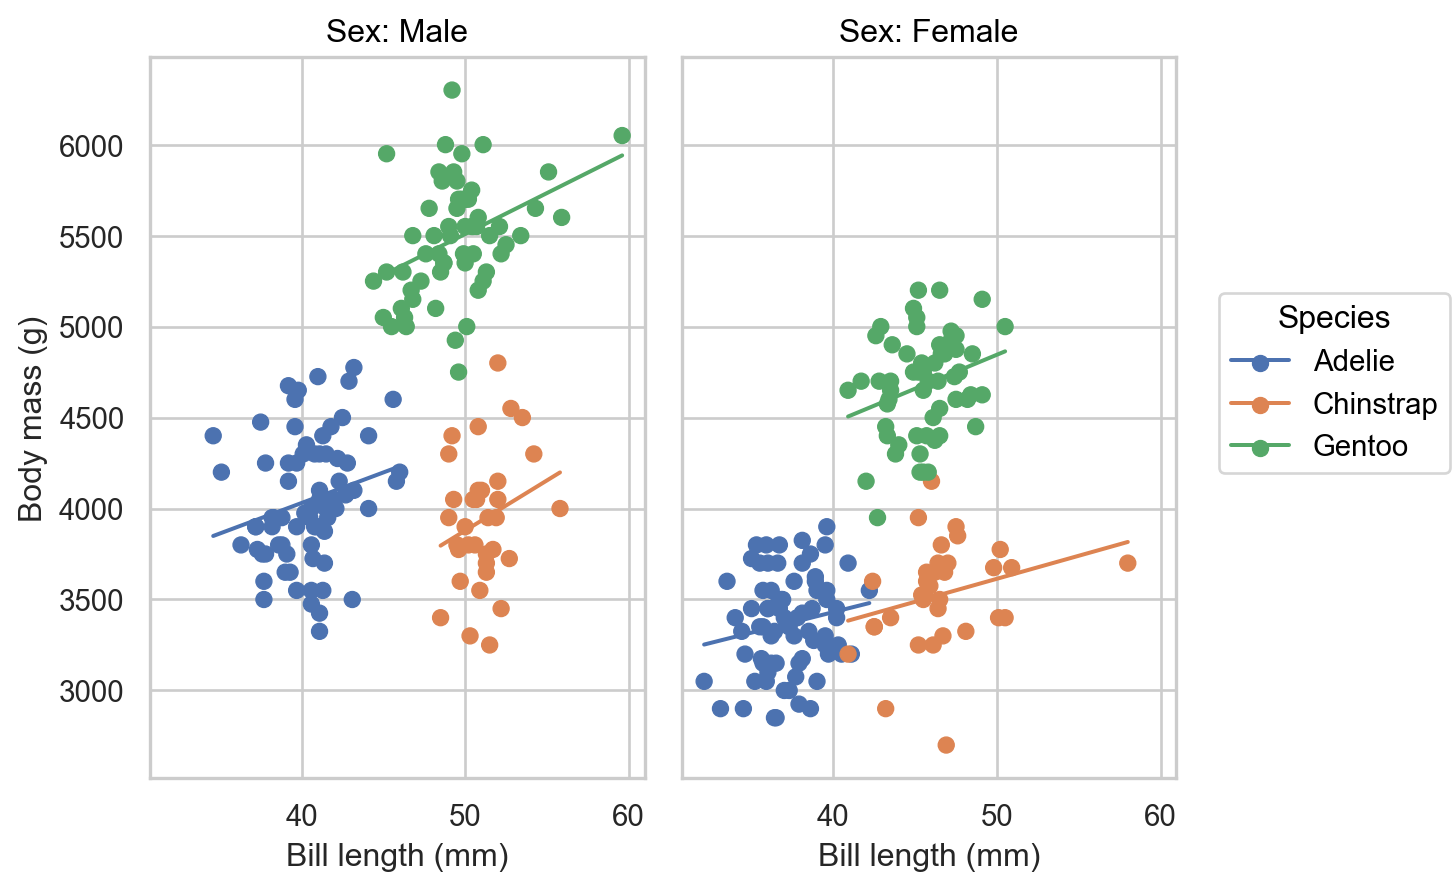

In [57]:
peng_plot = (
  so.Plot(penguins, x = "bill_length_mm", y = "body_mass_g", color = "species")
  .add(so.Dot())
  .add(so.Line(), so.PolyFit(1))
  .facet("sex")
  .label(
    x = "Bill length (mm)",
    y = "Body mass (g)",
    color = "Species",
    col = "Sex:",
    # title = "Bill length vs Body mass among Palmer's penguins"
  )
)
peng_plot

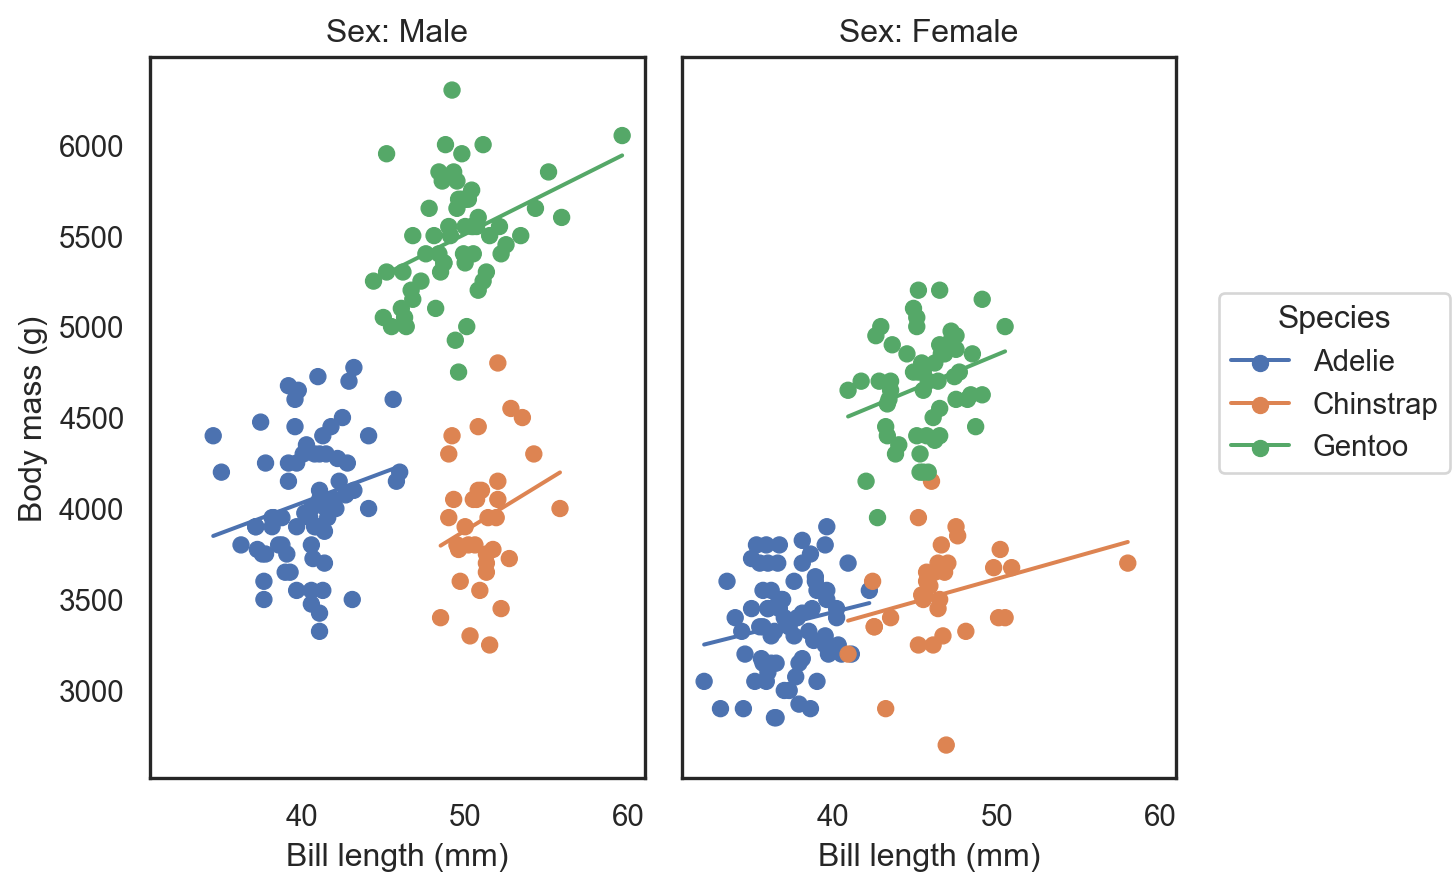

In [58]:
peng_plot.theme(sns.axes_style("white")) # setting a pre-built theme

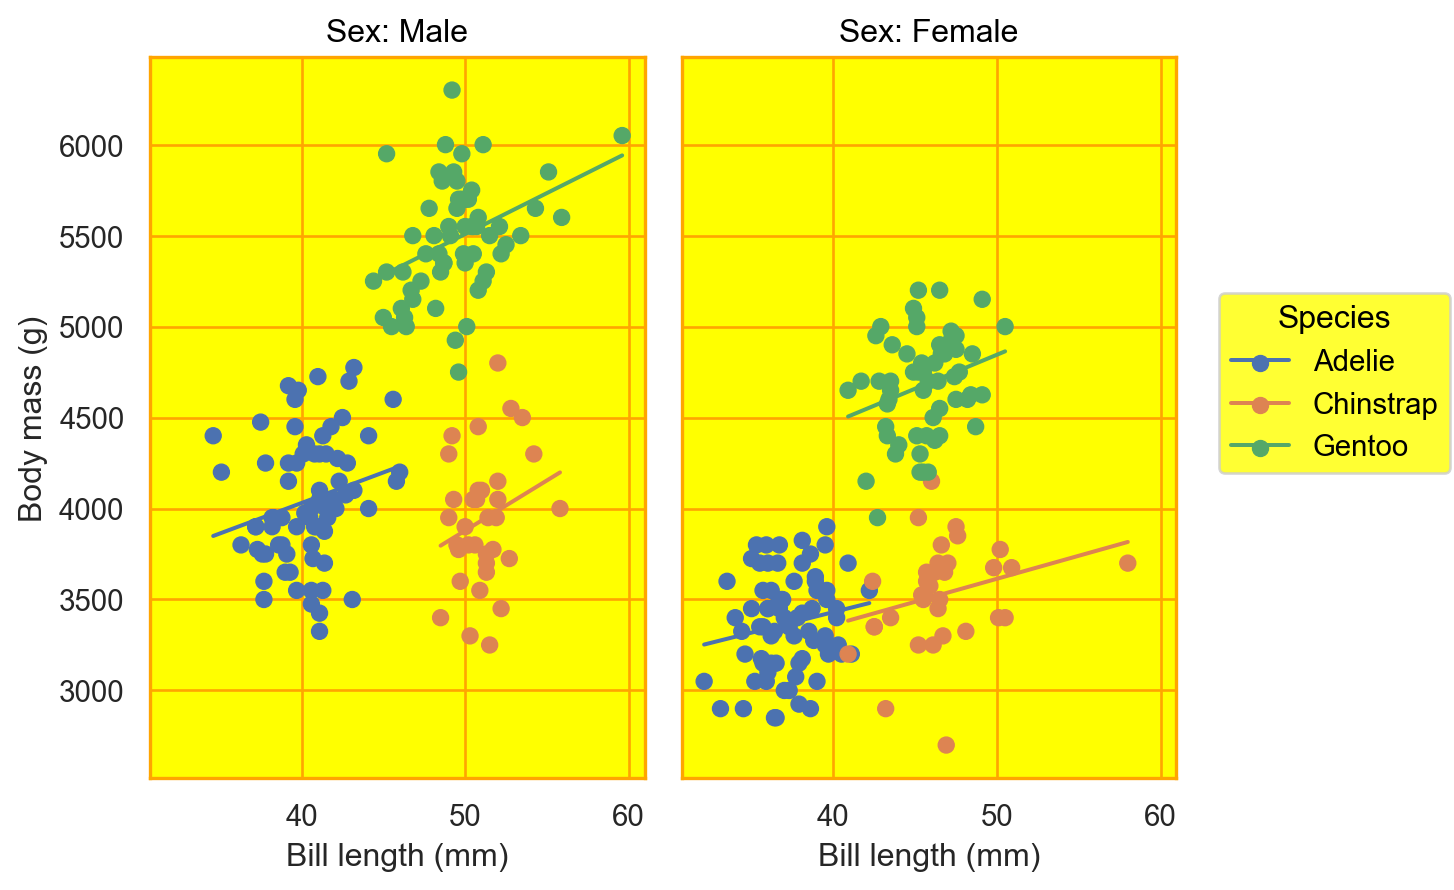

In [59]:
peng_plot.theme({
  'axes.facecolor': 'yellow',
  'axes.edgecolor': 'orange',
  'grid.color': 'orange'
  }) # changing particular rcParams

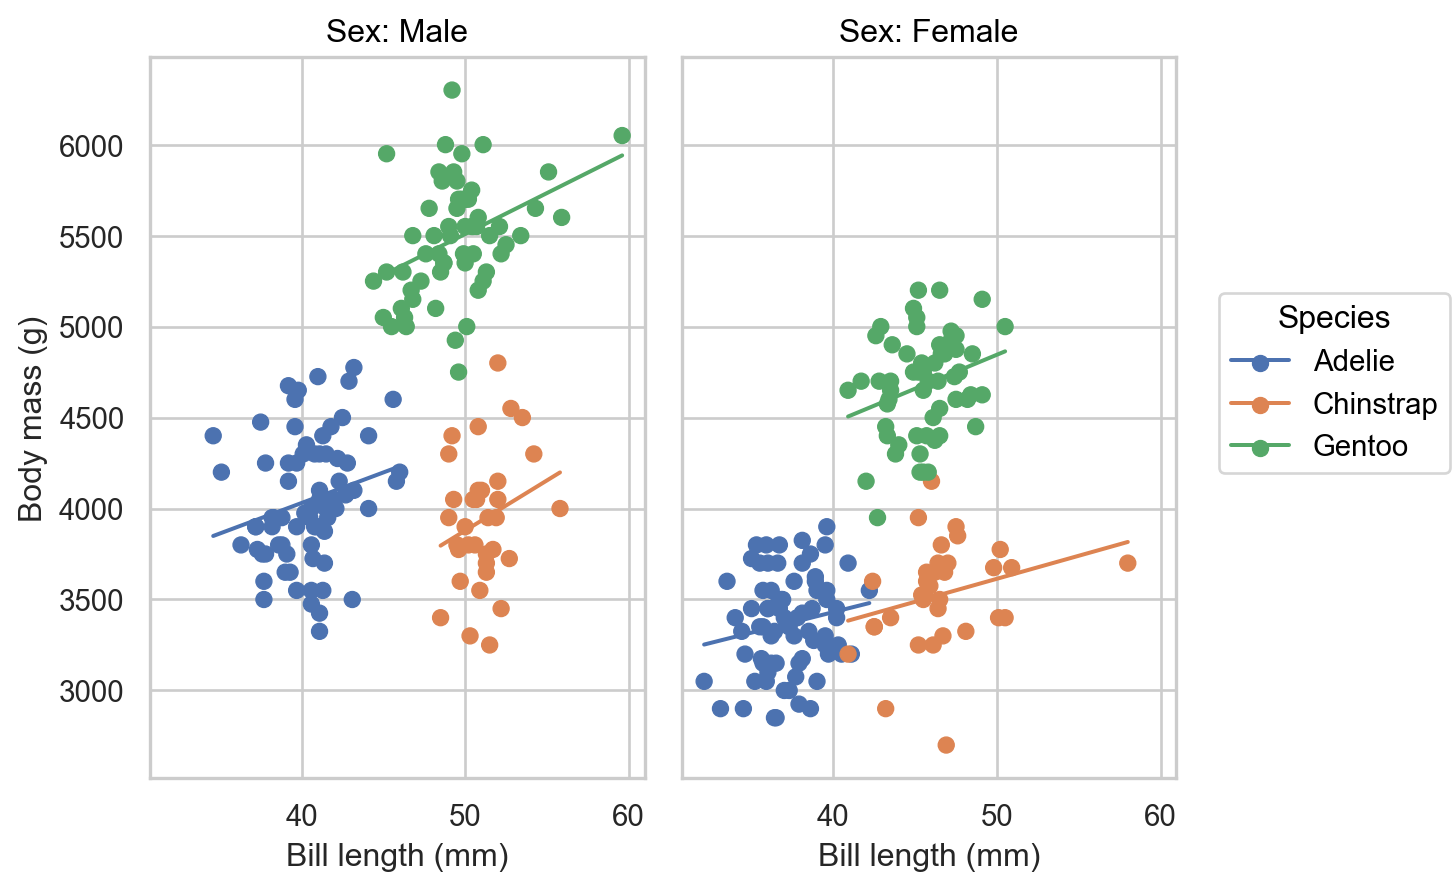

In [60]:
peng_plot

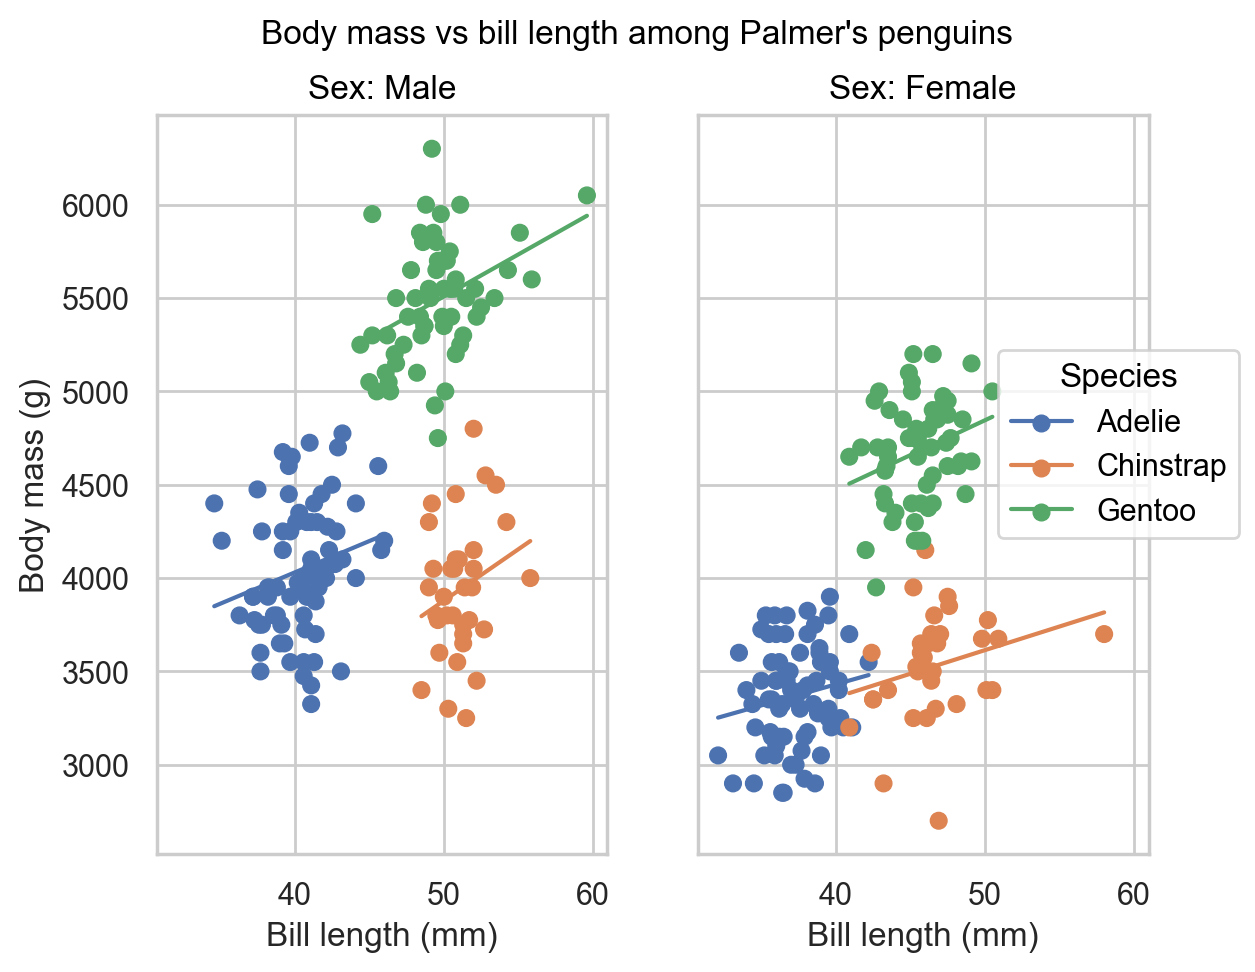

In [61]:
fig = plt.figure() #<1>
fig.suptitle("Body mass vs bill length among Palmer's penguins") #<2>
peng_plot.on(fig).show() #<3>